## 1. Biblioteki

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os
import talos as ta
from talos.model.early_stopper import early_stopper

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
%load_ext tensorboard


from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.model_selection import train_test_split


Using TensorFlow backend.



## 2. Dane

In [2]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["IE"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

caly_df.shape

(1881, 26)

In [3]:
caly_df.head()

,Województwo,Data urodzenia,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
0,WIELKOPOLSKIE,2020,137,127,121,113,106,128,109,107,...,1370,577,2,452,1,115.0,114.0,109.0,127.0,123.0
1,KUJAWSKO-POMORSKIE,2018,126,123,109,113,103,128,114,114,...,1209,358,-16,354,-4,115.0,113.0,104.0,123.0,123.0
2,POMORSKIE,2020,126,120,110,107,102,124,113,112,...,982,368,-4,350,4,104.0,103.0,102.0,122.0,117.0
3,KUJAWSKO-POMORSKIE,2020,133,111,104,110,99,114,114,113,...,1080,546,12,410,7,106.0,106.0,101.0,112.0,112.0
4,ZACHODNIOPOMORSKIE,2020,125,115,91,95,101,124,134,129,...,516,501,36,289,15,102.0,102.0,118.0,123.0,109.0


In [4]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   PI-PROD         1881 non-null   int64   
 3   PI-POKR         1881 non-null   int64   
 4   Prc             1881 non-null   int64   
 5   Psm             1881 non-null   int64   
 6   Pnr             1881 non-null   int64   
 7   Pw              1881 non-null   int64   
 8   PI-PLOD         1881 non-null   int64   
 9   CRj             1881 non-null   int64   
 10  CRk             1881 non-null   int64   
 11  PP              1881 non-null   int64   
 12  OMC             1881 non-null   int64   
 13  WH-KSOM         1881 non-null   int64   
 14  WH-DLUG         1881 non-null   int64   
 15  IP              1881 non-null   int64   
 16  kg ml           1881 non-null   int64   
 17  kg tł          

## 3. Usuwam mniejszości zmiennych kategorycznych

In [5]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [6]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [7]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [8]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [9]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [10]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [11]:
caly_df.shape

(1875, 26)

## 4. Zakodowuje zmienne kategoryczne

In [12]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

## 5. Klasyfikuje wartosci IE

(array([  2.,   0.,   2.,   9.,  11.,  12.,  29.,  25.,  22.,  71., 121.,
         61., 166., 174., 106., 234., 190.,  98., 148., 122.,  53.,  78.,
         58.,  20.,  33.,  13.,   9.,   5.,   1.,   2.]),
 array([ 82.        ,  83.66666667,  85.33333333,  87.        ,
         88.66666667,  90.33333333,  92.        ,  93.66666667,
         95.33333333,  97.        ,  98.66666667, 100.33333333,
        102.        , 103.66666667, 105.33333333, 107.        ,
        108.66666667, 110.33333333, 112.        , 113.66666667,
        115.33333333, 117.        , 118.66666667, 120.33333333,
        122.        , 123.66666667, 125.33333333, 127.        ,
        128.66666667, 130.33333333, 132.        ]),
 <BarContainer object of 30 artists>)

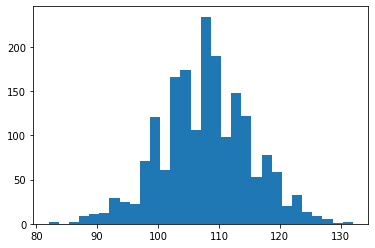

In [13]:
plt.hist(caly_df["OMC"],bins=30)

In [14]:
caly_df["OMC"].describe()

count    1875.000000
mean      107.665067
std         7.413236
min        82.000000
25%       103.000000
50%       107.000000
75%       112.000000
max       132.000000
Name: OMC, dtype: float64

In [15]:
caly_df.loc[(caly_df["OMC"]<=103), "Klasa"] = "Małe"
caly_df.loc[(103<caly_df["OMC"]) & (caly_df["OMC"]<=107), "Klasa"] = "Średnie"
caly_df.loc[(107<caly_df["OMC"]) & (caly_df["OMC"]<=112), "Klasa"] = "Wysokie"
caly_df.loc[caly_df["OMC"]>112, "Klasa"] = "Ekstrimum"

(array([415.,   0.,   0., 531.,   0.,   0., 465.,   0.,   0., 464.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

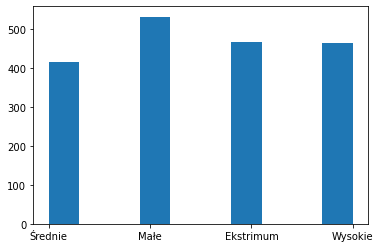

In [16]:
plt.hist(caly_df["Klasa"])

In [17]:
caly_df["Klasa"].value_counts()

Małe         531
Ekstrimum    465
Wysokie      464
Średnie      415
Name: Klasa, dtype: int64

In [18]:
list(caly_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 'Klasa']

In [19]:
train_df, test_df = train_test_split(caly_df, test_size=0.2, random_state=42,stratify=caly_df['Klasa'])
#test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42,stratify=test_df['Klasa'])

del train_df['Klasa']
del test_df['Klasa']
#del val_df['Klasa']


train_label=train_df['OMC']
test_label=test_df['OMC']
#val_label=val_df['IE']

del train_df['OMC']
del test_df['OMC']
#del val_df['IE']


In [20]:
list(train_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [21]:
len(list(train_df))

46

## 1.2 Standaryzacja

In [22]:
train_df.iloc[:,:23]

,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,PP,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
1119,133,115,105,107,111,113,104,105,103,96,...,1325,474,-8,429,0,107.0,109.0,117.0,111.0,114.0
1093,125,117,115,104,98,123,120,118,120,99,...,478,523,41,288,16,106.0,101.0,106.0,120.0,111.0
613,123,119,101,108,103,124,116,114,116,102,...,1091,418,-3,287,-8,107.0,107.0,112.0,125.0,118.0
3,131,113,98,100,103,117,115,113,116,102,...,902,516,17,378,10,105.0,103.0,110.0,118.0,109.0
816,121,112,105,94,103,116,120,117,122,99,...,1040,379,-5,270,-8,90.0,93.0,100.0,117.0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,129,113,90,100,100,121,120,116,121,105,...,843,602,30,316,5,101.0,100.0,114.0,121.0,111.0
608,126,118,108,108,110,116,113,107,113,117,...,783,374,6,348,11,108.0,107.0,117.0,115.0,113.0
273,125,111,96,108,107,111,109,108,107,104,...,983,398,0,321,0,107.0,106.0,116.0,115.0,111.0
1478,128,109,108,111,104,106,115,114,119,93,...,888,491,15,339,6,108.0,108.0,105.0,108.0,111.0


In [23]:
scaler = StandardScaler()
train_df.iloc[:,:23]=scaler.fit_transform(train_df.iloc[:,:23])
test_df.iloc[:,:23]=scaler.fit_transform(test_df.iloc[:,:23])
#val_df.iloc[:,14:]=scaler.fit_transform(val_df.iloc[:,14:])

In [24]:
train_df.iloc[:,20:23]

,nr,w,og
1119,0.680709,-1.138843,-0.140075
1093,-0.819652,0.104636,-0.584915
613,-0.001273,0.795458,0.453044
3,-0.274066,-0.171692,-0.881474
816,-1.638030,-0.309857,-1.178034
...,...,...,...
110,0.271520,0.242801,-0.584915
608,0.680709,-0.586185,-0.288355
273,0.544313,-0.586185,-0.584915
1478,-0.956048,-1.553336,-0.584915


In [25]:
train_df.shape

(1500, 46)

In [26]:
test_df.shape

(375, 46)

In [27]:
train_df = np.array(train_df)
test_df = np.array(test_df)

In [28]:
train_df

array([[ 0.93447873, -0.3516274 , -0.26760885, ...,  1.        ,
         0.        ,  0.        ],
       [-0.31999546, -0.07017537,  0.99231982, ...,  1.        ,
         0.        ,  0.        ],
       [-0.63361401,  0.21127666, -0.77158032, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.31999546, -0.91453145, -1.40154465, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15043236, -1.19598348,  0.11036975, ...,  1.        ,
         0.        ,  0.        ],
       [-0.16318618, -1.19598348, -2.40948759, ...,  0.        ,
         1.        ,  0.        ]])

In [29]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [30]:
train_label

array([ 97, 104, 103, ..., 104, 101, 102], dtype=int64)

In [31]:
METRICS=['mae']

# 2 Moduł TALOS

Zamiast dobierać wszystkie hiperparametry na nowo, sprawdzę czy siec preferuje inne w waskim zakresie

## 2.1 Słownik parametrów do wypróbowania

In [32]:
p = {'first_neuron':[80,160,240], #
     'hidden_neuron':[25],#
     'hidden_layers':[1],  #1 must
     'batch_size': [64], # 64
     'optimizer': ['adam'],# do zrobienia potem
     'kernel_initializer': ['ones'], # ones 
     'epochs': [20000], # never touch it
     'dropout': [0],  # po dopasowaniu znowu nie bedzie potrzebne
     'activation_layer':['selu'], # selu
     'batc_normalization':[False], # do zrobienia potem
     'last_activation': ['linear']} #never touch it
#     'optimizer': ['rmsprop','adam','adadelta','adamax','nadam','adagrad'],
#     
#    

## 2.2 Tworzę funkcję do tworzenia instancji modelu keras

In [33]:
def numerai_model(x_train, y_train, x_val, y_val, params):
    print(params)

    model = Sequential()
    
    ## initial layer
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer = params['kernel_initializer'] ))
    if params['batc_normalization']==True:
        model.add(BatchNormalization())
    model.add(Dropout(params['dropout']))
    
    ## hidden layers
    for i in range(params['hidden_layers']):
        print (f"adding layer {i+1}")
        model.add(Dense(params['hidden_neuron'], activation='relu',
                    kernel_initializer=params['kernel_initializer']))
        if params['batc_normalization']==True:
            model.add(BatchNormalization())
        model.add(Dropout(params['dropout']))
    
    
    ## final layer
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss='mean_absolute_error', 
                  optimizer=params['optimizer'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        callbacks = [early_stopper(params['epochs'], patience=5,monitor='val_loss')] #,ta.live(),
                        )

    return history, model

## 2.3 Przeprowadzam skan, używając parametrów i funkcji wyżej


In [34]:
t = ta.Scan(x=train_df, y=train_label,
            x_val=test_df, y_val=test_label,
            model=numerai_model,
            params=p,
            experiment_name='Predykcja OMC')

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 80, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 244us/sample - loss: 9297.1779 - val_loss: 8308.8048
Epoch 2/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 8644.7704 - val_loss: 7716.6574
Epoch 3/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 8032.8281 - val_loss: 7167.1309
Epoch 4/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 7466.3601 - val_loss: 6655.9228
Epoch 5/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 6944.4760 - val_loss: 6183.8764
Epoch 6/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 6452.5526 - val_loss: 5749.8933
Epoch

1500/1500 [==============================] - 0s 20us/sample - loss: 76.8748 - val_loss: 80.1165
Epoch 144/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.7536 - val_loss: 79.9890
Epoch 145/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.6376 - val_loss: 79.9001
Epoch 146/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 76.5244 - val_loss: 79.7753
Epoch 147/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 76.4018 - val_loss: 79.6709
Epoch 148/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.2845 - val_loss: 79.5665
Epoch 149/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 76.1706 - val_loss: 79.4825
Epoch 150/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 76.0504 - val_loss: 79.3398
Epoch 151/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 75.9283 - val_loss: 79.2301
Epoch 15

1500/1500 [==============================] - 0s 20us/sample - loss: 1.5629 - val_loss: 2.4698
Epoch 291/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.5740 - val_loss: 2.2792
Epoch 292/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.5445 - val_loss: 2.3381
Epoch 293/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.5446 - val_loss: 2.2035
Epoch 294/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.5356 - val_loss: 2.2531
Epoch 295/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.5147 - val_loss: 2.2391
Epoch 296/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.5431 - val_loss: 2.2447
Epoch 297/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.5114 - val_loss: 2.2146
Epoch 298/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.5460 - val_loss: 2.2190
Epoch 299/20000
1500/1500 

1500/1500 [==============================] - 0s 19us/sample - loss: 1.3091 - val_loss: 1.6063
Epoch 439/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2685 - val_loss: 1.7837
Epoch 440/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2538 - val_loss: 1.7346
Epoch 441/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2806 - val_loss: 1.6387
Epoch 442/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2765 - val_loss: 1.5889
Epoch 443/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.2683 - val_loss: 1.6394
Epoch 444/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2776 - val_loss: 1.5860
Epoch 445/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2732 - val_loss: 1.6542
Epoch 446/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.3165 - val_loss: 1.7592
Epoch 447/20000
1500/1500 

1500/1500 [==============================] - 0s 19us/sample - loss: 1.1943 - val_loss: 1.5066
Epoch 587/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.2857 - val_loss: 1.4051
Epoch 588/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.2180 - val_loss: 1.5376
Epoch 589/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.2471 - val_loss: 1.3799
Epoch 590/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1840 - val_loss: 1.3230
Epoch 591/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1735 - val_loss: 1.3979
Epoch 592/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1721 - val_loss: 1.3059
Epoch 593/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2410 - val_loss: 1.3911
Epoch 594/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2082 - val_loss: 1.5163
Epoch 595/20000
1500/1500 

1500/1500 [==============================] - 0s 22us/sample - loss: 1.1501 - val_loss: 1.2198
Epoch 735/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1503 - val_loss: 1.1910
Epoch 736/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1411 - val_loss: 1.2667
Epoch 737/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1867 - val_loss: 1.4070
Epoch 738/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1762 - val_loss: 1.3327
Epoch 739/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1508 - val_loss: 1.2791
Epoch 740/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1583 - val_loss: 1.2665
Epoch 741/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1437 - val_loss: 1.2579
Epoch 742/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1357 - val_loss: 1.2738
Epoch 743/20000
1500/1500 

1500/1500 [==============================] - 0s 21us/sample - loss: 1.1232 - val_loss: 1.1398
Epoch 883/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1398 - val_loss: 1.1973
Epoch 884/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1625 - val_loss: 1.2757
Epoch 885/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1530 - val_loss: 1.1903
Epoch 886/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1447 - val_loss: 1.3268
Epoch 887/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1506 - val_loss: 1.4039
Epoch 888/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1414 - val_loss: 1.1410
Epoch 889/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1534 - val_loss: 1.2580
Epoch 890/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1505 - val_loss: 1.3429
Epoch 891/20000
1500/1500 

1500/1500 [==============================] - 0s 20us/sample - loss: 1.2424 - val_loss: 1.1652
Epoch 1031/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1729 - val_loss: 1.2666
Epoch 1032/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1379 - val_loss: 1.1499
Epoch 1033/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1450 - val_loss: 1.1766
Epoch 1034/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1262 - val_loss: 1.2201
Epoch 1035/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1495 - val_loss: 1.1973
Epoch 1036/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1283 - val_loss: 1.1669
Epoch 1037/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1320 - val_loss: 1.2288
Epoch 1038/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1265 - val_loss: 1.1880
Epoch 1039/20000
1

Epoch 1104/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1260 - val_loss: 1.2251
Epoch 1105/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1826 - val_loss: 1.3739
Epoch 1106/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1656 - val_loss: 1.2970
Epoch 1107/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1397 - val_loss: 1.2579
Epoch 1108/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1365 - val_loss: 1.2375
Epoch 1109/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1310 - val_loss: 1.1977
Epoch 1110/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1632 - val_loss: 1.1477
Epoch 1111/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1575 - val_loss: 1.2162
Epoch 1112/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1538 - val_loss: 1.1696
E

Epoch 1178/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1373 - val_loss: 1.2226
Epoch 1179/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1216 - val_loss: 1.2634
Epoch 1180/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1754 - val_loss: 1.1680
Epoch 1181/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1642 - val_loss: 1.1502
Epoch 1182/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1387 - val_loss: 1.1733
Epoch 1183/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1483 - val_loss: 1.2961
Epoch 1184/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1676 - val_loss: 1.1571
Epoch 1185/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1454 - val_loss: 1.2266
Epoch 1186/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1966 - val_loss: 1.2150
E

Epoch 1252/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1458 - val_loss: 1.3549
Epoch 1253/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1431 - val_loss: 1.2441
Epoch 1254/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1801 - val_loss: 1.1467
Epoch 1255/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1479 - val_loss: 1.2369
Epoch 1256/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1475 - val_loss: 1.1853
Epoch 1257/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1287 - val_loss: 1.2328
Epoch 1258/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1428 - val_loss: 1.2575
Epoch 1259/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1585 - val_loss: 1.2994
Epoch 1260/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1317 - val_loss: 1.2024
E

Epoch 1326/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1357 - val_loss: 1.1894
Epoch 1327/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1460 - val_loss: 1.3705
Epoch 1328/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1747 - val_loss: 1.2535
Epoch 1329/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1630 - val_loss: 1.1728
Epoch 1330/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1617 - val_loss: 1.1422
Epoch 1331/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1576 - val_loss: 1.2472
Epoch 1332/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1199 - val_loss: 1.2208
Epoch 1333/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1328 - val_loss: 1.1717
Epoch 1334/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1123 - val_loss: 1.1751
E

Epoch 1400/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1364 - val_loss: 1.2080
Epoch 1401/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1480 - val_loss: 1.1666
Epoch 1402/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1695 - val_loss: 1.2137
Epoch 1403/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1479 - val_loss: 1.1723
Epoch 1404/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1359 - val_loss: 1.2019
Epoch 1405/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1333 - val_loss: 1.1389
Epoch 1406/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1713 - val_loss: 1.1792
Epoch 1407/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1731 - val_loss: 1.2465
Epoch 1408/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1146 - val_loss: 1.1889
E

Epoch 1474/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1190 - val_loss: 1.1926
Epoch 1475/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1256 - val_loss: 1.3443
Epoch 1476/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1444 - val_loss: 1.1454
Epoch 1477/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1945 - val_loss: 1.2241
Epoch 1478/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1193 - val_loss: 1.2159
Epoch 1479/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1677 - val_loss: 1.1615
Epoch 1480/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1323 - val_loss: 1.2387
Epoch 1481/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1581 - val_loss: 1.2153
Epoch 1482/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1526 - val_loss: 1.3089
E

Epoch 1548/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2531 - val_loss: 1.1423
Epoch 1549/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1558 - val_loss: 1.1718
Epoch 1550/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1513 - val_loss: 1.3302
Epoch 1551/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1739 - val_loss: 1.1475
Epoch 1552/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1205 - val_loss: 1.1840
Epoch 1553/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1182 - val_loss: 1.1800
Epoch 1554/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1323 - val_loss: 1.2010
Epoch 1555/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1275 - val_loss: 1.4411
Epoch 1556/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1682 - val_loss: 1.2049
E

Epoch 1622/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1363 - val_loss: 1.1977
Epoch 1623/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1604 - val_loss: 1.3204
Epoch 1624/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1483 - val_loss: 1.1548
Epoch 1625/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1914 - val_loss: 1.2216
Epoch 1626/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1482 - val_loss: 1.2314
Epoch 1627/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1682 - val_loss: 1.2351
Epoch 1628/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1655 - val_loss: 1.2073
Epoch 1629/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1705 - val_loss: 1.3639
Epoch 1630/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1801 - val_loss: 1.2751
E

Epoch 1696/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1356 - val_loss: 1.1265
Epoch 1697/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1131 - val_loss: 1.2112
Epoch 1698/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1391 - val_loss: 1.1635
Epoch 1699/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1489 - val_loss: 1.2469
Epoch 1700/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1471 - val_loss: 1.1682
Epoch 1701/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1411 - val_loss: 1.2877
Epoch 1702/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1367 - val_loss: 1.2228
Epoch 1703/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2082 - val_loss: 1.2671
Epoch 1704/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1483 - val_loss: 1.1457
E

Epoch 1770/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1446 - val_loss: 1.3617
Epoch 1771/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1694 - val_loss: 1.1822
Epoch 1772/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1243 - val_loss: 1.2818
Epoch 1773/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1477 - val_loss: 1.1393
Epoch 1774/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1446 - val_loss: 1.2893
Epoch 1775/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1299 - val_loss: 1.3453
Epoch 1776/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1203 - val_loss: 1.1413
Epoch 1777/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1149 - val_loss: 1.1412
Epoch 1778/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1535 - val_loss: 1.1899
E

Epoch 1844/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1460 - val_loss: 1.2423
Epoch 1845/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1368 - val_loss: 1.2389
Epoch 1846/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1449 - val_loss: 1.1507
Epoch 1847/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1643 - val_loss: 1.2276
Epoch 1848/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1477 - val_loss: 1.2786
Epoch 1849/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1543 - val_loss: 1.1409
Epoch 1850/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1684 - val_loss: 1.2175
Epoch 1851/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1354 - val_loss: 1.2197
Epoch 1852/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1200 - val_loss: 1.1577
E

Epoch 1918/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1237 - val_loss: 1.1475
Epoch 1919/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1252 - val_loss: 1.1884
Epoch 1920/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1478 - val_loss: 1.2964
Epoch 1921/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2266 - val_loss: 1.2809
Epoch 1922/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1966 - val_loss: 1.2964
Epoch 1923/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1334 - val_loss: 1.2057
Epoch 1924/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1100 - val_loss: 1.2202
Epoch 1925/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1243 - val_loss: 1.1481
Epoch 1926/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1304 - val_loss: 1.1705
E

Epoch 1992/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1644 - val_loss: 1.1988
Epoch 1993/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1299 - val_loss: 1.2252
Epoch 1994/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1204 - val_loss: 1.2055
Epoch 1995/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1445 - val_loss: 1.1846
Epoch 1996/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1188 - val_loss: 1.1316
Epoch 1997/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1347 - val_loss: 1.2046
Epoch 1998/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1241 - val_loss: 1.2543
Epoch 1999/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1512 - val_loss: 1.2016
Epoch 2000/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1290 - val_loss: 1.1322
E

Epoch 2066/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1163 - val_loss: 1.1603
Epoch 2067/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1234 - val_loss: 1.1716
Epoch 2068/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1664 - val_loss: 1.3000
Epoch 2069/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1705 - val_loss: 1.1677
Epoch 2070/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1530 - val_loss: 1.1606
Epoch 2071/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1348 - val_loss: 1.1584
Epoch 2072/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1955 - val_loss: 1.2139
Epoch 2073/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1462 - val_loss: 1.2859
Epoch 2074/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1277 - val_loss: 1.1557
E

Epoch 2140/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1245 - val_loss: 1.2968
Epoch 2141/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1687 - val_loss: 1.1540
Epoch 2142/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1478 - val_loss: 1.1559
Epoch 2143/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1341 - val_loss: 1.1865
Epoch 2144/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1322 - val_loss: 1.1695
Epoch 2145/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1233 - val_loss: 1.1650
Epoch 2146/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1563 - val_loss: 1.1837
Epoch 2147/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1367 - val_loss: 1.1534
Epoch 2148/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1365 - val_loss: 1.7031
E

Epoch 2214/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1222 - val_loss: 1.2977
Epoch 2215/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1439 - val_loss: 1.2119
Epoch 2216/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1216 - val_loss: 1.1793
Epoch 2217/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1462 - val_loss: 1.2907
Epoch 2218/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1403 - val_loss: 1.2909
Epoch 2219/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1371 - val_loss: 1.5386
Epoch 2220/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1666 - val_loss: 1.2338
Epoch 2221/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1144 - val_loss: 1.3395
Epoch 2222/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1511 - val_loss: 1.1721
E

Epoch 2288/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1247 - val_loss: 1.2091
Epoch 2289/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1386 - val_loss: 1.2196
Epoch 2290/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1786 - val_loss: 1.4054
Epoch 2291/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1298 - val_loss: 1.1731
Epoch 2292/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1393 - val_loss: 1.2093
Epoch 2293/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1170 - val_loss: 1.1385
Epoch 2294/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1297 - val_loss: 1.1743
Epoch 2295/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1460 - val_loss: 1.1677
Epoch 2296/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1926 - val_loss: 1.2191
E

Epoch 2362/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1326 - val_loss: 1.2628
Epoch 2363/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1583 - val_loss: 1.2082
Epoch 2364/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1508 - val_loss: 1.2159
Epoch 2365/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1414 - val_loss: 1.2357
Epoch 2366/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1317 - val_loss: 1.1620
Epoch 2367/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1196 - val_loss: 1.2134
Epoch 2368/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1254 - val_loss: 1.3297
Epoch 2369/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1607 - val_loss: 1.1966
Epoch 2370/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1669 - val_loss: 1.2154
E

Epoch 2436/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1255 - val_loss: 1.1604
Epoch 2437/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1352 - val_loss: 1.2014
Epoch 2438/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1744 - val_loss: 1.2376
Epoch 2439/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1886 - val_loss: 1.2136
Epoch 2440/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1305 - val_loss: 1.3302
Epoch 2441/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1499 - val_loss: 1.1584
Epoch 2442/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1552 - val_loss: 1.1981
Epoch 2443/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1159 - val_loss: 1.2326
Epoch 2444/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1396 - val_loss: 1.2374
E

Epoch 2510/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1295 - val_loss: 1.1589
Epoch 2511/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1796 - val_loss: 1.2532
Epoch 2512/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1277 - val_loss: 1.2962
Epoch 2513/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1250 - val_loss: 1.1550
Epoch 2514/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1597 - val_loss: 1.1840
Epoch 2515/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1249 - val_loss: 1.1853
Epoch 2516/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1278 - val_loss: 1.2087
Epoch 2517/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1341 - val_loss: 1.1869
Epoch 2518/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1393 - val_loss: 1.2156
E

Epoch 2584/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1379 - val_loss: 1.2040
Epoch 2585/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1259 - val_loss: 1.1913
Epoch 2586/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1229 - val_loss: 1.1410
Epoch 2587/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1684 - val_loss: 1.4457
Epoch 2588/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.2048 - val_loss: 1.2235
Epoch 2589/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1558 - val_loss: 1.2858
Epoch 2590/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1401 - val_loss: 1.1924
Epoch 2591/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1357 - val_loss: 1.1852
Epoch 2592/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1201 - val_loss: 1.2295
E

Epoch 2658/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1257 - val_loss: 1.1614
Epoch 2659/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1150 - val_loss: 1.2318
Epoch 2660/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1799 - val_loss: 1.1667
Epoch 2661/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1629 - val_loss: 1.1532
Epoch 2662/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1527 - val_loss: 1.3278
Epoch 2663/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1505 - val_loss: 1.1924
Epoch 2664/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2110 - val_loss: 1.3362
Epoch 2665/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1477 - val_loss: 1.1684
Epoch 2666/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1427 - val_loss: 1.1808
E

Epoch 2732/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1424 - val_loss: 1.1578
Epoch 2733/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1320 - val_loss: 1.1722
Epoch 2734/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1359 - val_loss: 1.1868
Epoch 2735/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1531 - val_loss: 1.1268
Epoch 2736/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1896 - val_loss: 1.4662
Epoch 2737/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1690 - val_loss: 1.2211
Epoch 2738/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1097 - val_loss: 1.1521
Epoch 2739/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1435 - val_loss: 1.3616
Epoch 2740/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1528 - val_loss: 1.1807
E

Epoch 2806/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1884 - val_loss: 1.2178
Epoch 2807/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2186 - val_loss: 1.1869
Epoch 2808/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1273 - val_loss: 1.2130
Epoch 2809/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1195 - val_loss: 1.2374
Epoch 2810/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1539 - val_loss: 1.2034
Epoch 2811/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1208 - val_loss: 1.1771
Epoch 2812/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1391 - val_loss: 1.1869
Epoch 2813/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1332 - val_loss: 1.4677
Epoch 2814/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1513 - val_loss: 1.2650
E

Epoch 2880/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1402 - val_loss: 1.2042
Epoch 2881/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1372 - val_loss: 1.1449
Epoch 2882/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1335 - val_loss: 1.3033
Epoch 2883/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1637 - val_loss: 1.1500
Epoch 2884/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1327 - val_loss: 1.1583
Epoch 2885/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1244 - val_loss: 1.1964
Epoch 2886/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1368 - val_loss: 1.1424
Epoch 2887/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1569 - val_loss: 1.3559
Epoch 2888/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1179 - val_loss: 1.1886
E

Epoch 2954/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1226 - val_loss: 1.1541
Epoch 2955/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1127 - val_loss: 1.1984
Epoch 2956/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1640 - val_loss: 1.1557
Epoch 2957/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1598 - val_loss: 1.4079
Epoch 2958/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1581 - val_loss: 1.1394
Epoch 2959/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1741 - val_loss: 1.1668
Epoch 2960/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1248 - val_loss: 1.1700
Epoch 2961/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1252 - val_loss: 1.2316
Epoch 2962/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1240 - val_loss: 1.2429
E

Epoch 3028/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1237 - val_loss: 1.2488
Epoch 3029/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1250 - val_loss: 1.1868
Epoch 3030/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1340 - val_loss: 1.3336
Epoch 3031/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1317 - val_loss: 1.3670
Epoch 3032/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1509 - val_loss: 1.1662
Epoch 3033/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1552 - val_loss: 1.1523
Epoch 3034/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1528 - val_loss: 1.3167
Epoch 3035/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1428 - val_loss: 1.2709
Epoch 3036/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1453 - val_loss: 1.2006
E

Epoch 3102/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1240 - val_loss: 1.2321
Epoch 3103/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1153 - val_loss: 1.1853
Epoch 3104/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1194 - val_loss: 1.1482
Epoch 3105/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1231 - val_loss: 1.1701
Epoch 3106/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1643 - val_loss: 1.3287
Epoch 3107/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1538 - val_loss: 1.2979
Epoch 3108/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1714 - val_loss: 1.1528
Epoch 3109/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1708 - val_loss: 1.2316
Epoch 3110/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1689 - val_loss: 1.1402
E

Epoch 3176/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1277 - val_loss: 1.2405
Epoch 3177/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1380 - val_loss: 1.2178
Epoch 3178/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1979 - val_loss: 1.1978
Epoch 3179/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1400 - val_loss: 1.3107
Epoch 3180/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1254 - val_loss: 1.1913
Epoch 3181/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1281 - val_loss: 1.2821
Epoch 3182/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1436 - val_loss: 1.1978
Epoch 3183/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1020 - val_loss: 1.1839
Epoch 3184/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1314 - val_loss: 1.1972
E

Epoch 3250/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1483 - val_loss: 1.1307
Epoch 3251/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1210 - val_loss: 1.3248
Epoch 3252/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1249 - val_loss: 1.2990
Epoch 3253/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1339 - val_loss: 1.1429
Epoch 3254/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1308 - val_loss: 1.2144
Epoch 3255/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1243 - val_loss: 1.2043
Epoch 3256/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1466 - val_loss: 1.2149
Epoch 3257/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1119 - val_loss: 1.1635
Epoch 3258/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1708 - val_loss: 1.2263
E

Epoch 3324/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1578 - val_loss: 1.2134
Epoch 3325/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1755 - val_loss: 1.2202
Epoch 3326/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1357 - val_loss: 1.1849
Epoch 3327/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1394 - val_loss: 1.1472
Epoch 3328/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1213 - val_loss: 1.1897
Epoch 3329/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1329 - val_loss: 1.1289
Epoch 3330/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1551 - val_loss: 1.2281
Epoch 3331/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1610 - val_loss: 1.1820
Epoch 3332/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1551 - val_loss: 1.2756
E

Epoch 3398/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.2146 - val_loss: 1.1685
Epoch 3399/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1095 - val_loss: 1.1298
Epoch 3400/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1358 - val_loss: 1.1985
Epoch 3401/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1687 - val_loss: 1.3481
Epoch 3402/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1447 - val_loss: 1.1619
Epoch 3403/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1254 - val_loss: 1.1806
Epoch 3404/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1321 - val_loss: 1.2192
Epoch 3405/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1754 - val_loss: 1.3236
Epoch 3406/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1256 - val_loss: 1.2290
E

Epoch 3472/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1473 - val_loss: 1.1512
Epoch 3473/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1627 - val_loss: 1.5487
Epoch 3474/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1996 - val_loss: 1.1745
Epoch 3475/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1804 - val_loss: 1.2612
Epoch 3476/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1726 - val_loss: 1.2579
Epoch 3477/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1005 - val_loss: 1.2054
Epoch 3478/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1466 - val_loss: 1.4120
Epoch 3479/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1567 - val_loss: 1.1283
Epoch 3480/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1255 - val_loss: 1.3468
E

Epoch 3546/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1276 - val_loss: 1.2280
Epoch 3547/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1321 - val_loss: 1.1877
Epoch 3548/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1124 - val_loss: 1.1553
Epoch 3549/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1210 - val_loss: 1.4275
Epoch 3550/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1601 - val_loss: 1.1802
Epoch 3551/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1263 - val_loss: 1.1758
Epoch 3552/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1150 - val_loss: 1.2214
Epoch 3553/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1615 - val_loss: 1.1575
Epoch 3554/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1900 - val_loss: 1.2433
E

Epoch 3620/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1371 - val_loss: 1.2613
Epoch 3621/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1621 - val_loss: 1.3022
Epoch 3622/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1220 - val_loss: 1.1824
Epoch 3623/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1399 - val_loss: 1.1865
Epoch 3624/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1576 - val_loss: 1.2550
Epoch 3625/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1302 - val_loss: 1.4373
Epoch 3626/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1636 - val_loss: 1.1765
Epoch 3627/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1207 - val_loss: 1.2340
Epoch 3628/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1400 - val_loss: 1.5344
E

Epoch 3694/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1156 - val_loss: 1.1780
Epoch 3695/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1440 - val_loss: 1.1815
Epoch 3696/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1385 - val_loss: 1.1966
Epoch 3697/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1131 - val_loss: 1.1711
Epoch 3698/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1329 - val_loss: 1.2095
Epoch 3699/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1361 - val_loss: 1.1569
Epoch 3700/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1318 - val_loss: 1.2629
Epoch 3701/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1225 - val_loss: 1.2347
Epoch 3702/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1243 - val_loss: 1.3533
E

Epoch 3768/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1688 - val_loss: 1.2310
Epoch 3769/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1608 - val_loss: 1.1600
Epoch 3770/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1400 - val_loss: 1.1913
Epoch 3771/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1348 - val_loss: 1.2417
Epoch 3772/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1476 - val_loss: 1.1647
Epoch 3773/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1597 - val_loss: 1.2925
Epoch 3774/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1366 - val_loss: 1.1486
Epoch 3775/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1085 - val_loss: 1.1448
Epoch 3776/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1462 - val_loss: 1.2605
E

Epoch 3842/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1279 - val_loss: 1.1360
Epoch 3843/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1372 - val_loss: 1.2058
Epoch 3844/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1622 - val_loss: 1.2204
Epoch 3845/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1613 - val_loss: 1.3302
Epoch 3846/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1352 - val_loss: 1.1830
Epoch 3847/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.0996 - val_loss: 1.1808
Epoch 3848/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1323 - val_loss: 1.2089
Epoch 3849/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1544 - val_loss: 1.1319
Epoch 3850/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1249 - val_loss: 1.3878
E

Epoch 3916/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1559 - val_loss: 1.4762
Epoch 3917/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1558 - val_loss: 1.2161
Epoch 3918/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1382 - val_loss: 1.1649
Epoch 3919/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1302 - val_loss: 1.2148
Epoch 3920/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1084 - val_loss: 1.2353
Epoch 3921/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1333 - val_loss: 1.1900
Epoch 3922/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1198 - val_loss: 1.3457
Epoch 3923/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1374 - val_loss: 1.1642
Epoch 3924/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1476 - val_loss: 1.1848
E

Epoch 3990/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2341 - val_loss: 1.2244
Epoch 3991/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1807 - val_loss: 1.2147
Epoch 3992/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1241 - val_loss: 1.1644
Epoch 3993/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1667 - val_loss: 1.1985
Epoch 3994/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1497 - val_loss: 1.2808
Epoch 3995/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1443 - val_loss: 1.2603
Epoch 3996/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1404 - val_loss: 1.2102
Epoch 3997/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1172 - val_loss: 1.2820
Epoch 3998/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1404 - val_loss: 1.1799
E

Epoch 4064/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1174 - val_loss: 1.2720
Epoch 4065/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1222 - val_loss: 1.2730
Epoch 4066/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1649 - val_loss: 1.1365
Epoch 4067/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1631 - val_loss: 1.2208
Epoch 4068/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1449 - val_loss: 1.2064
Epoch 4069/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1242 - val_loss: 1.1667
Epoch 4070/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1315 - val_loss: 1.3098
Epoch 4071/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1433 - val_loss: 1.1556
Epoch 4072/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1649 - val_loss: 1.3385
E

Epoch 4138/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1190 - val_loss: 1.1655
Epoch 4139/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1466 - val_loss: 1.2152
Epoch 4140/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1589 - val_loss: 1.3898
Epoch 4141/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1432 - val_loss: 1.1449
Epoch 4142/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1301 - val_loss: 1.1623
Epoch 4143/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1295 - val_loss: 1.1783
Epoch 4144/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1137 - val_loss: 1.3367
Epoch 4145/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1884 - val_loss: 1.2163
Epoch 4146/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1510 - val_loss: 1.2530
E

Epoch 4212/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1925 - val_loss: 1.5204
Epoch 4213/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1497 - val_loss: 1.1398
Epoch 4214/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1316 - val_loss: 1.2235
Epoch 4215/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1306 - val_loss: 1.2945
Epoch 4216/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1290 - val_loss: 1.2030
Epoch 4217/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1341 - val_loss: 1.2624
Epoch 4218/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1388 - val_loss: 1.2160
Epoch 4219/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1398 - val_loss: 1.2338
Epoch 4220/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1265 - val_loss: 1.2659
E

Epoch 4286/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1500 - val_loss: 1.1583
Epoch 4287/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2404 - val_loss: 1.4364
Epoch 4288/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1839 - val_loss: 1.1677
Epoch 4289/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1172 - val_loss: 1.1425
Epoch 4290/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1559 - val_loss: 1.4219
Epoch 4291/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1639 - val_loss: 1.1415
Epoch 4292/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1567 - val_loss: 1.2264
Epoch 4293/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1690 - val_loss: 1.2089
Epoch 4294/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1666 - val_loss: 1.2495
E

Epoch 4360/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1183 - val_loss: 1.2767
Epoch 4361/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1464 - val_loss: 1.1862
Epoch 4362/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1362 - val_loss: 1.2105
Epoch 4363/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1431 - val_loss: 1.2410
Epoch 4364/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1201 - val_loss: 1.1587
Epoch 4365/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1733 - val_loss: 1.2055
Epoch 4366/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1730 - val_loss: 1.3267
Epoch 4367/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1095 - val_loss: 1.2414
Epoch 4368/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1698 - val_loss: 1.1605
E

Epoch 4434/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1292 - val_loss: 1.3164
Epoch 4435/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1929 - val_loss: 1.1869
Epoch 4436/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2206 - val_loss: 1.2584
Epoch 4437/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1858 - val_loss: 1.2772
Epoch 4438/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1190 - val_loss: 1.2385
Epoch 4439/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1256 - val_loss: 1.1890
Epoch 4440/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1331 - val_loss: 1.2186
Epoch 4441/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1393 - val_loss: 1.1482
Epoch 4442/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1336 - val_loss: 1.1630
E

Epoch 4508/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1374 - val_loss: 1.1349
Epoch 4509/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1470 - val_loss: 1.1738
Epoch 4510/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1458 - val_loss: 1.1326
Epoch 4511/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1254 - val_loss: 1.3346
Epoch 4512/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1791 - val_loss: 1.1884
Epoch 4513/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1344 - val_loss: 1.1656
Epoch 4514/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1222 - val_loss: 1.2898
Epoch 4515/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1413 - val_loss: 1.2144
Epoch 4516/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1180 - val_loss: 1.2100
E

Epoch 4582/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1101 - val_loss: 1.1433
Epoch 4583/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1161 - val_loss: 1.1419
Epoch 4584/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1702 - val_loss: 1.4408
Epoch 4585/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2337 - val_loss: 1.1973
Epoch 4586/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1230 - val_loss: 1.3286
Epoch 4587/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1359 - val_loss: 1.1807
Epoch 4588/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1044 - val_loss: 1.1828
Epoch 4589/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1481 - val_loss: 1.1600
Epoch 4590/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1292 - val_loss: 1.3586
E

Epoch 4656/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1623 - val_loss: 1.1419
Epoch 4657/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1594 - val_loss: 1.1626
Epoch 4658/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1181 - val_loss: 1.2587
Epoch 4659/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1338 - val_loss: 1.6324
Epoch 4660/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1492 - val_loss: 1.2536
Epoch 4661/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1149 - val_loss: 1.1866
Epoch 4662/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1572 - val_loss: 1.1967
Epoch 4663/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2031 - val_loss: 1.2212
Epoch 4664/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1498 - val_loss: 1.2441
E

Epoch 4730/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1558 - val_loss: 1.2322
Epoch 4731/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1232 - val_loss: 1.1131
Epoch 4732/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1479 - val_loss: 1.2082
Epoch 4733/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1188 - val_loss: 1.1598
Epoch 4734/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1621 - val_loss: 1.1413
Epoch 4735/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1407 - val_loss: 1.2045
Epoch 4736/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1198 - val_loss: 1.1867
Epoch 4737/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1399 - val_loss: 1.2356
Epoch 4738/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1266 - val_loss: 1.1969
E

Epoch 4804/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1507 - val_loss: 1.1800
Epoch 4805/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1331 - val_loss: 1.1757
Epoch 4806/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1346 - val_loss: 1.1441
Epoch 4807/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1882 - val_loss: 1.3489
Epoch 4808/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1764 - val_loss: 1.2500
Epoch 4809/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1373 - val_loss: 1.1515
Epoch 4810/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1182 - val_loss: 1.1660
Epoch 4811/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1383 - val_loss: 1.2018
Epoch 4812/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1245 - val_loss: 1.3928
E

Epoch 4878/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1373 - val_loss: 1.1908
Epoch 4879/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1549 - val_loss: 1.3841
Epoch 4880/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1914 - val_loss: 1.1835
Epoch 4881/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1320 - val_loss: 1.1809
Epoch 4882/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1432 - val_loss: 1.1868
Epoch 4883/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1364 - val_loss: 1.1640
Epoch 4884/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.2078 - val_loss: 1.2272
Epoch 4885/20000
1500/1500 [==============================] - ETA: 0s - loss: 1.281 - 0s 19us/sample - loss: 1.1633 - val_loss: 1.2478
Epoch 4886/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1

Epoch 5025/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1328 - val_loss: 1.2228
Epoch 5026/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1283 - val_loss: 1.1682
Epoch 5027/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1337 - val_loss: 1.3990
Epoch 5028/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1359 - val_loss: 1.2441
Epoch 5029/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1134 - val_loss: 1.2606
Epoch 5030/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1415 - val_loss: 1.1796
Epoch 5031/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1661 - val_loss: 1.2416
Epoch 5032/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1228 - val_loss: 1.1584
Epoch 5033/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1455 - val_loss: 1.2409
E

Epoch 5099/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1132 - val_loss: 1.1458
Epoch 5100/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1375 - val_loss: 1.2362
Epoch 5101/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1276 - val_loss: 1.2664
Epoch 5102/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1448 - val_loss: 1.1430
Epoch 5103/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1629 - val_loss: 1.4399
Epoch 5104/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1620 - val_loss: 1.1946
Epoch 5105/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1490 - val_loss: 1.3251
Epoch 5106/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1467 - val_loss: 1.1460
Epoch 5107/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1529 - val_loss: 1.4020
E

Epoch 5173/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1212 - val_loss: 1.1678
Epoch 5174/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1091 - val_loss: 1.4439
Epoch 5175/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1849 - val_loss: 1.1964
Epoch 5176/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1353 - val_loss: 1.2921
Epoch 5177/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1939 - val_loss: 1.1843
Epoch 5178/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1540 - val_loss: 1.1497
Epoch 5179/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1549 - val_loss: 1.2607
Epoch 5180/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1319 - val_loss: 1.3127
Epoch 5181/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1475 - val_loss: 1.3269
E

Epoch 5247/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1426 - val_loss: 1.2538
Epoch 5248/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1582 - val_loss: 1.4253
Epoch 5249/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.2045 - val_loss: 1.1631
Epoch 5250/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1562 - val_loss: 1.2044
Epoch 5251/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1361 - val_loss: 1.1417
Epoch 5252/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1893 - val_loss: 1.2331
Epoch 5253/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1490 - val_loss: 1.1386
Epoch 5254/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1332 - val_loss: 1.1644
Epoch 5255/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1202 - val_loss: 1.3920
E

Epoch 5321/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1140 - val_loss: 1.2379
Epoch 5322/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1651 - val_loss: 1.3642
Epoch 5323/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1783 - val_loss: 1.1781
Epoch 5324/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1883 - val_loss: 1.2109
Epoch 5325/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1367 - val_loss: 1.1543
Epoch 5326/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1198 - val_loss: 1.1965
Epoch 5327/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1408 - val_loss: 1.4178
Epoch 5328/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1595 - val_loss: 1.2109
Epoch 5329/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.2333 - val_loss: 1.3269
E

Epoch 5395/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1194 - val_loss: 1.2170
Epoch 5396/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1244 - val_loss: 1.1932
Epoch 5397/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1277 - val_loss: 1.2459
Epoch 5398/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1382 - val_loss: 1.1355
Epoch 5399/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1384 - val_loss: 1.1829
Epoch 5400/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1248 - val_loss: 1.1522
Epoch 5401/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1089 - val_loss: 1.2672
Epoch 5402/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1377 - val_loss: 1.1612
Epoch 5403/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1297 - val_loss: 1.2383
E

Epoch 5469/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1528 - val_loss: 1.1572
Epoch 5470/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1857 - val_loss: 1.2137
Epoch 5471/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1508 - val_loss: 1.1694
Epoch 5472/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1579 - val_loss: 1.2548
Epoch 5473/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1254 - val_loss: 1.2504
Epoch 5474/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1467 - val_loss: 1.2129
Epoch 5475/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1548 - val_loss: 1.5616
Epoch 5476/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1712 - val_loss: 1.2555
Epoch 5477/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1464 - val_loss: 1.1845
E

Epoch 5543/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1553 - val_loss: 1.2111
Epoch 5544/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1357 - val_loss: 1.2075
Epoch 5545/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1447 - val_loss: 1.1860
Epoch 5546/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1169 - val_loss: 1.2131
Epoch 5547/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1617 - val_loss: 1.2275
Epoch 5548/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 1.1391 - val_loss: 1.3259
Epoch 5549/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1439 - val_loss: 1.1984
Epoch 5550/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1253 - val_loss: 1.2024
Epoch 5551/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1477 - val_loss: 1.2814
E

Epoch 5617/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1654 - val_loss: 1.2141
Epoch 5618/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1527 - val_loss: 1.1747
Epoch 5619/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1563 - val_loss: 1.3309
Epoch 5620/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1422 - val_loss: 1.2471
Epoch 5621/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1354 - val_loss: 1.1595
Epoch 5622/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1166 - val_loss: 1.1378
Epoch 5623/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1395 - val_loss: 1.1831
Epoch 5624/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1137 - val_loss: 1.3781
Epoch 5625/20000
1500/1500 [==============================] - 0s 17us/sample - loss: 1.1381 - val_loss: 1.1617
E

Epoch 5691/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1342 - val_loss: 1.1788
Epoch 5692/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1218 - val_loss: 1.1676
Epoch 5693/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1273 - val_loss: 1.1767
Epoch 5694/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1334 - val_loss: 1.2001
Epoch 5695/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1268 - val_loss: 1.1991
Epoch 5696/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 1.1270 - val_loss: 1.2779
Epoch 5697/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1510 - val_loss: 1.1282
Epoch 5698/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1361 - val_loss: 1.1822
Epoch 5699/20000
1500/1500 [==============================] - 0s 18us/sample - loss: 1.1409 - val_loss: 1.3049
E

 33%|███████████████████████████▋                                                       | 1/3 [02:50<05:41, 170.75s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 160, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 215us/sample - loss: 18617.6065 - val_loss: 16644.7254
Epoch 2/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 17311.2338 - val_loss: 15469.2400
Epoch 3/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 16088.3239 - val_loss: 14365.2772
Epoch 4/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 14958.6157 - val_loss: 13335.4894
Epoch 5/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 13908.0224 - val_loss: 12384.3965
Epoch 6/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 12934.8533 - val_loss: 115

Epoch 70/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 219.3272 - val_loss: 189.6115
Epoch 71/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 209.2275 - val_loss: 181.4076
Epoch 72/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 199.9542 - val_loss: 173.6070
Epoch 73/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 191.0508 - val_loss: 166.7914
Epoch 74/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 182.9067 - val_loss: 160.2369
Epoch 75/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 175.2179 - val_loss: 154.1026
Epoch 76/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 168.1147 - val_loss: 148.1491
Epoch 77/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 161.3357 - val_loss: 142.8152
Epoch 78/20000
1500/1500 [==============================] - 0s 19us/sample - loss: 155.1363 - va

1500/1500 [==============================] - 0s 25us/sample - loss: 80.7046 - val_loss: 84.1978
Epoch 144/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 80.6228 - val_loss: 84.1504
Epoch 145/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 80.5372 - val_loss: 84.0583
Epoch 146/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.4498 - val_loss: 83.9886
Epoch 147/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 80.3654 - val_loss: 83.9156
Epoch 148/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 80.2843 - val_loss: 83.8393
Epoch 149/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.2019 - val_loss: 83.7755
Epoch 150/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 80.1188 - val_loss: 83.6762
Epoch 151/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 80.0312 - val_loss: 83.6024
Epoch 15

1500/1500 [==============================] - 0s 21us/sample - loss: 12.1763 - val_loss: 10.8435
Epoch 290/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 10.5177 - val_loss: 9.5182
Epoch 291/20000
1500/1500 [==============================] - 0s 20us/sample - loss: 9.0618 - val_loss: 8.1065
Epoch 292/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 7.6812 - val_loss: 6.9726
Epoch 293/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 6.4561 - val_loss: 5.9882
Epoch 294/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 5.4105 - val_loss: 5.1310
Epoch 295/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 4.4638 - val_loss: 4.3412
Epoch 296/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 3.6849 - val_loss: 3.8252
Epoch 297/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 3.0056 - val_loss: 3.2839
Epoch 298/20000
1500/15

1500/1500 [==============================] - 0s 23us/sample - loss: 1.3918 - val_loss: 2.0161
Epoch 438/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4066 - val_loss: 1.8106
Epoch 439/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.4208 - val_loss: 1.8420
Epoch 440/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3387 - val_loss: 1.8267
Epoch 441/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3340 - val_loss: 1.9712
Epoch 442/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.3706 - val_loss: 1.7855
Epoch 443/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3663 - val_loss: 1.9717
Epoch 444/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3688 - val_loss: 1.7763
Epoch 445/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4290 - val_loss: 1.8965
Epoch 446/20000
1500/1500 

1500/1500 [==============================] - 0s 23us/sample - loss: 1.2105 - val_loss: 1.5099
Epoch 586/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1867 - val_loss: 1.4060
Epoch 587/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1986 - val_loss: 1.4764
Epoch 588/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.2514 - val_loss: 1.3219
Epoch 589/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2373 - val_loss: 1.4854
Epoch 590/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2214 - val_loss: 1.6899
Epoch 591/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2218 - val_loss: 1.5407
Epoch 592/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.2039 - val_loss: 1.3257
Epoch 593/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1974 - val_loss: 1.5464
Epoch 594/20000
1500/1500 

1500/1500 [==============================] - 0s 23us/sample - loss: 1.1588 - val_loss: 1.2540
Epoch 734/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1507 - val_loss: 1.2868
Epoch 735/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1368 - val_loss: 1.2017
Epoch 736/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2020 - val_loss: 1.2986
Epoch 737/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1610 - val_loss: 1.2681
Epoch 738/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.2296 - val_loss: 1.4202
Epoch 739/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1399 - val_loss: 1.2435
Epoch 740/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1781 - val_loss: 1.2885
Epoch 741/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1716 - val_loss: 1.4111
Epoch 742/20000
1500/1500 

1500/1500 [==============================] - 0s 23us/sample - loss: 1.2604 - val_loss: 1.3244
Epoch 882/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1531 - val_loss: 1.2144
Epoch 883/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1440 - val_loss: 1.3892
Epoch 884/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1568 - val_loss: 1.2181
Epoch 885/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1523 - val_loss: 1.4054
Epoch 886/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1937 - val_loss: 1.2468
Epoch 887/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2147 - val_loss: 1.3527
Epoch 888/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1671 - val_loss: 1.2229
Epoch 889/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1437 - val_loss: 1.3043
Epoch 890/20000
1500/1500 

1500/1500 [==============================] - 0s 25us/sample - loss: 1.1468 - val_loss: 1.2050
Epoch 1030/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1314 - val_loss: 1.2326
Epoch 1031/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1676 - val_loss: 1.1780
Epoch 1032/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1976 - val_loss: 1.2652
Epoch 1033/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1498 - val_loss: 1.2163
Epoch 1034/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1217 - val_loss: 1.2251
Epoch 1035/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1548 - val_loss: 1.1832
Epoch 1036/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1417 - val_loss: 1.2112
Epoch 1037/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1400 - val_loss: 1.1703
Epoch 1038/20000
1

Epoch 1103/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1367 - val_loss: 1.1686
Epoch 1104/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1532 - val_loss: 1.2412
Epoch 1105/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1541 - val_loss: 1.2640
Epoch 1106/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1343 - val_loss: 1.1745
Epoch 1107/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1350 - val_loss: 1.1895
Epoch 1108/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1822 - val_loss: 1.2256
Epoch 1109/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1788 - val_loss: 1.5007
Epoch 1110/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1658 - val_loss: 1.1704
Epoch 1111/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1219 - val_loss: 1.2458
E

Epoch 1177/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1752 - val_loss: 1.2439
Epoch 1178/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1517 - val_loss: 1.2202
Epoch 1179/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1748 - val_loss: 1.3406
Epoch 1180/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1551 - val_loss: 1.4458
Epoch 1181/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2236 - val_loss: 1.1684
Epoch 1182/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1943 - val_loss: 1.1914
Epoch 1183/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1319 - val_loss: 1.5319
Epoch 1184/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1736 - val_loss: 1.2832
Epoch 1185/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2807 - val_loss: 1.3004
E

Epoch 1251/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1627 - val_loss: 1.1920
Epoch 1252/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1651 - val_loss: 1.1347
Epoch 1253/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1555 - val_loss: 1.1770
Epoch 1254/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1666 - val_loss: 1.3428
Epoch 1255/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1728 - val_loss: 1.2730
Epoch 1256/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1418 - val_loss: 1.5176
Epoch 1257/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2193 - val_loss: 1.2600
Epoch 1258/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1458 - val_loss: 1.2491
Epoch 1259/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1724 - val_loss: 1.2535
E

Epoch 1325/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1406 - val_loss: 1.3060
Epoch 1326/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1717 - val_loss: 1.1537
Epoch 1327/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1195 - val_loss: 1.2081
Epoch 1328/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2369 - val_loss: 1.1546
Epoch 1329/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1844 - val_loss: 1.3434
Epoch 1330/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1915 - val_loss: 1.2609
Epoch 1331/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1701 - val_loss: 1.2002
Epoch 1332/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1540 - val_loss: 1.2105
Epoch 1333/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1598 - val_loss: 1.2712
E

Epoch 1399/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1457 - val_loss: 1.2056
Epoch 1400/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1766 - val_loss: 1.2284
Epoch 1401/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1625 - val_loss: 1.1932
Epoch 1402/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1680 - val_loss: 1.2723
Epoch 1403/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1448 - val_loss: 1.2080
Epoch 1404/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1410 - val_loss: 1.2392
Epoch 1405/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1312 - val_loss: 1.2015
Epoch 1406/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1204 - val_loss: 1.1994
Epoch 1407/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1388 - val_loss: 1.1765
E

Epoch 1473/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2076 - val_loss: 1.3290
Epoch 1474/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1694 - val_loss: 1.1313
Epoch 1475/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1825 - val_loss: 1.1950
Epoch 1476/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.2186 - val_loss: 1.3716
Epoch 1477/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1533 - val_loss: 1.1800
Epoch 1478/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1749 - val_loss: 1.2411
Epoch 1479/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1333 - val_loss: 1.2336
Epoch 1480/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1760 - val_loss: 1.3321
Epoch 1481/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1333 - val_loss: 1.2582
E

Epoch 1547/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1462 - val_loss: 1.2869
Epoch 1548/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1835 - val_loss: 1.1292
Epoch 1549/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1478 - val_loss: 1.2577
Epoch 1550/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1609 - val_loss: 1.2330
Epoch 1551/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1937 - val_loss: 1.2724
Epoch 1552/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1489 - val_loss: 1.1764
Epoch 1553/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1726 - val_loss: 1.2339
Epoch 1554/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1789 - val_loss: 1.1724
Epoch 1555/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1325 - val_loss: 1.1990
E

Epoch 1621/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1657 - val_loss: 1.2127
Epoch 1622/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1425 - val_loss: 1.2743
Epoch 1623/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1504 - val_loss: 1.1849
Epoch 1624/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1615 - val_loss: 1.3489
Epoch 1625/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1222 - val_loss: 1.1366
Epoch 1626/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1283 - val_loss: 1.1542
Epoch 1627/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1360 - val_loss: 1.1990
Epoch 1628/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1269 - val_loss: 1.3253
Epoch 1629/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1552 - val_loss: 1.1596
E

Epoch 1695/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.2351 - val_loss: 1.1723
Epoch 1696/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1068 - val_loss: 1.1368
Epoch 1697/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1450 - val_loss: 1.2230
Epoch 1698/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1528 - val_loss: 1.1449
Epoch 1699/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1779 - val_loss: 1.1922
Epoch 1700/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2156 - val_loss: 1.4320
Epoch 1701/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1372 - val_loss: 1.1916
Epoch 1702/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1648 - val_loss: 1.2293
Epoch 1703/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1419 - val_loss: 1.3288
E

Epoch 1769/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.2345 - val_loss: 1.6998
Epoch 1770/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1968 - val_loss: 1.2623
Epoch 1771/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1550 - val_loss: 1.1874
Epoch 1772/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1761 - val_loss: 1.1952
Epoch 1773/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1409 - val_loss: 1.2721
Epoch 1774/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1465 - val_loss: 1.2583
Epoch 1775/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1383 - val_loss: 1.1949
Epoch 1776/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1386 - val_loss: 1.2070
Epoch 1777/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1241 - val_loss: 1.1382
E

Epoch 1843/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1483 - val_loss: 1.2831
Epoch 1844/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1642 - val_loss: 1.1609
Epoch 1845/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1613 - val_loss: 1.3900
Epoch 1846/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1765 - val_loss: 1.1661
Epoch 1847/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1421 - val_loss: 1.1574
Epoch 1848/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1749 - val_loss: 1.1921
Epoch 1849/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1421 - val_loss: 1.1339
Epoch 1850/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1389 - val_loss: 1.2358
Epoch 1851/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1819 - val_loss: 1.3907
E

Epoch 1917/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1584 - val_loss: 1.3214
Epoch 1918/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1500 - val_loss: 1.1546
Epoch 1919/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.2250 - val_loss: 1.4020
Epoch 1920/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1503 - val_loss: 1.1780
Epoch 1921/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1571 - val_loss: 1.2316
Epoch 1922/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.1217 - val_loss: 1.2130
Epoch 1923/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1781 - val_loss: 1.1656
Epoch 1924/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1542 - val_loss: 1.1883
Epoch 1925/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1432 - val_loss: 1.2455
E

Epoch 1991/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1632 - val_loss: 1.2020
Epoch 1992/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1165 - val_loss: 1.3555
Epoch 1993/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1649 - val_loss: 1.1586
Epoch 1994/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1101 - val_loss: 1.3220
Epoch 1995/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1508 - val_loss: 1.1960
Epoch 1996/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1324 - val_loss: 1.3370
Epoch 1997/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2261 - val_loss: 1.1824
Epoch 1998/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1754 - val_loss: 1.1377
Epoch 1999/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1441 - val_loss: 1.2064
E

Epoch 2065/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1553 - val_loss: 1.1592
Epoch 2066/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1699 - val_loss: 1.2028
Epoch 2067/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1786 - val_loss: 1.1672
Epoch 2068/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1105 - val_loss: 1.1228
Epoch 2069/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1201 - val_loss: 1.1580
Epoch 2070/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1130 - val_loss: 1.1755
Epoch 2071/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1338 - val_loss: 1.3792
Epoch 2072/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1419 - val_loss: 1.1938
Epoch 2073/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1241 - val_loss: 1.2946
E

Epoch 2139/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1465 - val_loss: 1.2076
Epoch 2140/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1475 - val_loss: 1.3710
Epoch 2141/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1340 - val_loss: 1.2427
Epoch 2142/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.2113 - val_loss: 1.1451
Epoch 2143/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.2090 - val_loss: 1.1399
Epoch 2144/20000
1500/1500 [==============================] - 0s 21us/sample - loss: 1.1860 - val_loss: 1.3519
Epoch 2145/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1556 - val_loss: 1.2594
Epoch 2146/20000
1500/1500 [==============================] - 0s 22us/sample - loss: 1.1248 - val_loss: 1.2634
Epoch 2147/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1327 - val_loss: 1.2133
E

Epoch 2213/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.1467 - val_loss: 1.1670
Epoch 2214/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1722 - val_loss: 1.2964
Epoch 2215/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1372 - val_loss: 1.1663
Epoch 2216/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1416 - val_loss: 1.2309
Epoch 2217/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1508 - val_loss: 1.2054
Epoch 2218/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1305 - val_loss: 1.3273
Epoch 2219/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1736 - val_loss: 1.2261
Epoch 2220/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1655 - val_loss: 1.5343
Epoch 2221/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2064 - val_loss: 1.2497
E

Epoch 2287/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1178 - val_loss: 1.2415
Epoch 2288/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1248 - val_loss: 1.1694
Epoch 2289/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1320 - val_loss: 1.1670
Epoch 2290/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.1335 - val_loss: 1.1272
Epoch 2291/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1352 - val_loss: 1.1579
Epoch 2292/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1359 - val_loss: 1.2394
Epoch 2293/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1524 - val_loss: 1.2729
Epoch 2294/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1551 - val_loss: 1.2412
Epoch 2295/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1438 - val_loss: 1.2497
E

Epoch 2434/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1690 - val_loss: 1.2562
Epoch 2435/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1626 - val_loss: 1.1811
Epoch 2436/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1413 - val_loss: 1.1569
Epoch 2437/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1287 - val_loss: 1.2863
Epoch 2438/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1144 - val_loss: 1.1871
Epoch 2439/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1596 - val_loss: 1.1893
Epoch 2440/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1700 - val_loss: 1.1626
Epoch 2441/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1460 - val_loss: 1.3789
Epoch 2442/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1523 - val_loss: 1.2639
E

Epoch 2508/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1438 - val_loss: 1.1552
Epoch 2509/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1605 - val_loss: 1.1971
Epoch 2510/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1614 - val_loss: 1.1853
Epoch 2511/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1342 - val_loss: 1.2143
Epoch 2512/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1354 - val_loss: 1.1847
Epoch 2513/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1682 - val_loss: 1.1806
Epoch 2514/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1173 - val_loss: 1.1852
Epoch 2515/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1194 - val_loss: 1.1491
Epoch 2516/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1374 - val_loss: 1.3484
E

Epoch 2582/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1648 - val_loss: 1.1868
Epoch 2583/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1946 - val_loss: 1.1507
Epoch 2584/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1526 - val_loss: 1.3320
Epoch 2585/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1842 - val_loss: 1.1729
Epoch 2586/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1866 - val_loss: 1.2267
Epoch 2587/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1443 - val_loss: 1.1805
Epoch 2588/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1429 - val_loss: 1.1683
Epoch 2589/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1436 - val_loss: 1.1806
Epoch 2590/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1300 - val_loss: 1.2464
E

Epoch 2656/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1481 - val_loss: 1.3202
Epoch 2657/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1527 - val_loss: 1.1889
Epoch 2658/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1511 - val_loss: 1.2397
Epoch 2659/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1355 - val_loss: 1.2473
Epoch 2660/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1406 - val_loss: 1.4673
Epoch 2661/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1775 - val_loss: 1.1745
Epoch 2662/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1304 - val_loss: 1.4314
Epoch 2663/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1942 - val_loss: 1.2269
Epoch 2664/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1503 - val_loss: 1.2024
E

Epoch 2730/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1360 - val_loss: 1.1942
Epoch 2731/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1953 - val_loss: 1.2850
Epoch 2732/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1348 - val_loss: 1.2040
Epoch 2733/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1698 - val_loss: 1.2429
Epoch 2734/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1380 - val_loss: 1.2234
Epoch 2735/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1365 - val_loss: 1.3262
Epoch 2736/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1979 - val_loss: 1.1500
Epoch 2737/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1825 - val_loss: 1.1584
Epoch 2738/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1223 - val_loss: 1.2425
E

Epoch 2804/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1797 - val_loss: 1.1945
Epoch 2805/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1247 - val_loss: 1.1470
Epoch 2806/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1392 - val_loss: 1.2009
Epoch 2807/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1601 - val_loss: 1.2514
Epoch 2808/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1538 - val_loss: 1.2182
Epoch 2809/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1523 - val_loss: 1.2892
Epoch 2810/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1463 - val_loss: 1.3088
Epoch 2811/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1648 - val_loss: 1.1710
Epoch 2812/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1411 - val_loss: 1.2891
E

Epoch 2878/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1900 - val_loss: 1.1718
Epoch 2879/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1345 - val_loss: 1.1887
Epoch 2880/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1686 - val_loss: 1.2942
Epoch 2881/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1423 - val_loss: 1.2046
Epoch 2882/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1645 - val_loss: 1.2655
Epoch 2883/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2225 - val_loss: 1.2781
Epoch 2884/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1591 - val_loss: 1.2537
Epoch 2885/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1808 - val_loss: 1.1619
Epoch 2886/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1327 - val_loss: 1.2132
E

Epoch 2952/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1828 - val_loss: 1.2449
Epoch 2953/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1559 - val_loss: 1.4725
Epoch 2954/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.2158 - val_loss: 1.1596
Epoch 2955/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1643 - val_loss: 1.1973
Epoch 2956/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1354 - val_loss: 1.2313
Epoch 2957/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1393 - val_loss: 1.1856
Epoch 2958/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1310 - val_loss: 1.2502
Epoch 2959/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1410 - val_loss: 1.2159
Epoch 2960/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1897 - val_loss: 1.3103
E

Epoch 3026/20000
1500/1500 [==============================] - 0s 39us/sample - loss: 1.1375 - val_loss: 1.1726
Epoch 3027/20000
1500/1500 [==============================] - 0s 38us/sample - loss: 1.1524 - val_loss: 1.1878
Epoch 3028/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.1682 - val_loss: 1.2325
Epoch 3029/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1564 - val_loss: 1.3076
Epoch 3030/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1956 - val_loss: 1.1786
Epoch 3031/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1841 - val_loss: 1.2139
Epoch 3032/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1640 - val_loss: 1.2883
Epoch 3033/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.2046 - val_loss: 1.2143
Epoch 3034/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1738 - val_loss: 1.3997
E

Epoch 3100/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1052 - val_loss: 1.2309
Epoch 3101/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1360 - val_loss: 1.2142
Epoch 3102/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.1727 - val_loss: 1.2288
Epoch 3103/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1491 - val_loss: 1.1793
Epoch 3104/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1340 - val_loss: 1.2624
Epoch 3105/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1209 - val_loss: 1.1689
Epoch 3106/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1418 - val_loss: 1.1789
Epoch 3107/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1540 - val_loss: 1.2984
Epoch 3108/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1583 - val_loss: 1.2264
E

Epoch 3247/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1282 - val_loss: 1.5262
Epoch 3248/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1769 - val_loss: 1.1421
Epoch 3249/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1731 - val_loss: 1.2438
Epoch 3250/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1616 - val_loss: 1.1828
Epoch 3251/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1253 - val_loss: 1.2669
Epoch 3252/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1262 - val_loss: 1.2105
Epoch 3253/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1226 - val_loss: 1.2079
Epoch 3254/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1472 - val_loss: 1.2920
Epoch 3255/20000
1500/1500 [==============================] - ETA: 0s - loss: 1.148 - 0s 24us/sample - loss: 1.1

Epoch 3394/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1445 - val_loss: 1.1715
Epoch 3395/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1849 - val_loss: 1.1690
Epoch 3396/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1535 - val_loss: 1.1969
Epoch 3397/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1400 - val_loss: 1.2095
Epoch 3398/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1187 - val_loss: 1.1952
Epoch 3399/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1287 - val_loss: 1.2539
Epoch 3400/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1332 - val_loss: 1.1899
Epoch 3401/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1712 - val_loss: 1.1639
Epoch 3402/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1490 - val_loss: 1.3435
E

Epoch 3468/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1530 - val_loss: 1.2890
Epoch 3469/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1405 - val_loss: 1.2328
Epoch 3470/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1505 - val_loss: 1.1627
Epoch 3471/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1505 - val_loss: 1.2069
Epoch 3472/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1417 - val_loss: 1.2704
Epoch 3473/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1453 - val_loss: 1.1887
Epoch 3474/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1229 - val_loss: 1.1474
Epoch 3475/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1310 - val_loss: 1.1813
Epoch 3476/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1115 - val_loss: 1.2210
E

Epoch 3542/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1618 - val_loss: 1.1662
Epoch 3543/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1406 - val_loss: 1.1750
Epoch 3544/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1466 - val_loss: 1.1825
Epoch 3545/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1501 - val_loss: 1.1735
Epoch 3546/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1494 - val_loss: 1.2112
Epoch 3547/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1367 - val_loss: 1.3001
Epoch 3548/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1571 - val_loss: 1.2218
Epoch 3549/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1159 - val_loss: 1.2252
Epoch 3550/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1690 - val_loss: 1.3266
E

Epoch 3616/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2156 - val_loss: 1.1960
Epoch 3617/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1384 - val_loss: 1.3152
Epoch 3618/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1255 - val_loss: 1.2086
Epoch 3619/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1624 - val_loss: 1.3168
Epoch 3620/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1628 - val_loss: 1.1710
Epoch 3621/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1339 - val_loss: 1.1623
Epoch 3622/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1465 - val_loss: 1.2078
Epoch 3623/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1655 - val_loss: 1.2608
Epoch 3624/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1752 - val_loss: 1.2592
E

Epoch 3690/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1386 - val_loss: 1.2428
Epoch 3691/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1451 - val_loss: 1.1821
Epoch 3692/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1302 - val_loss: 1.2434
Epoch 3693/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1296 - val_loss: 1.1289
Epoch 3694/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1367 - val_loss: 1.3276
Epoch 3695/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1638 - val_loss: 1.2842
Epoch 3696/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1477 - val_loss: 1.2140
Epoch 3697/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1622 - val_loss: 1.2603
Epoch 3698/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1821 - val_loss: 1.1731
E

Epoch 3764/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1537 - val_loss: 1.1573
Epoch 3765/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1875 - val_loss: 1.3305
Epoch 3766/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1460 - val_loss: 1.4668
Epoch 3767/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1892 - val_loss: 1.2559
Epoch 3768/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1367 - val_loss: 1.3194
Epoch 3769/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1452 - val_loss: 1.3210
Epoch 3770/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1261 - val_loss: 1.1847
Epoch 3771/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1379 - val_loss: 1.2298
Epoch 3772/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1362 - val_loss: 1.2837
E

Epoch 3838/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1709 - val_loss: 1.1630
Epoch 3839/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1603 - val_loss: 1.2512
Epoch 3840/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1580 - val_loss: 1.1672
Epoch 3841/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1309 - val_loss: 1.2248
Epoch 3842/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1514 - val_loss: 1.2174
Epoch 3843/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1553 - val_loss: 1.1871
Epoch 3844/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1741 - val_loss: 1.3150
Epoch 3845/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1680 - val_loss: 1.2272
Epoch 3846/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1415 - val_loss: 1.1717
E

Epoch 3912/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1420 - val_loss: 1.1544
Epoch 3913/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1301 - val_loss: 1.2957
Epoch 3914/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1435 - val_loss: 1.2031
Epoch 3915/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1585 - val_loss: 1.2390
Epoch 3916/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1490 - val_loss: 1.2056
Epoch 3917/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1338 - val_loss: 1.2347
Epoch 3918/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1641 - val_loss: 1.4331
Epoch 3919/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1751 - val_loss: 1.1862
Epoch 3920/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1407 - val_loss: 1.2128
E

Epoch 3986/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1202 - val_loss: 1.1842
Epoch 3987/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1234 - val_loss: 1.3552
Epoch 3988/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1575 - val_loss: 1.1677
Epoch 3989/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1715 - val_loss: 1.1512
Epoch 3990/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1351 - val_loss: 1.2004
Epoch 3991/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1846 - val_loss: 1.4714
Epoch 3992/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1723 - val_loss: 1.2107
Epoch 3993/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1456 - val_loss: 1.1962
Epoch 3994/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1230 - val_loss: 1.2529
E

Epoch 4060/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1196 - val_loss: 1.2367
Epoch 4061/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1390 - val_loss: 1.3844
Epoch 4062/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1338 - val_loss: 1.2169
Epoch 4063/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1316 - val_loss: 1.1896
Epoch 4064/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1406 - val_loss: 1.2988
Epoch 4065/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1277 - val_loss: 1.2426
Epoch 4066/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1787 - val_loss: 1.4901
Epoch 4067/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1464 - val_loss: 1.1629
Epoch 4068/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1633 - val_loss: 1.2831
E

Epoch 4207/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1812 - val_loss: 1.1903
Epoch 4208/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1332 - val_loss: 1.4592
Epoch 4209/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.2059 - val_loss: 1.2263
Epoch 4210/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1585 - val_loss: 1.2525
Epoch 4211/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2037 - val_loss: 1.1578
Epoch 4212/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.2621 - val_loss: 1.6663
Epoch 4213/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1580 - val_loss: 1.2849
Epoch 4214/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1282 - val_loss: 1.1820
Epoch 4215/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1301 - val_loss: 1.2406
E

Epoch 4281/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.2046 - val_loss: 1.2104
Epoch 4282/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1221 - val_loss: 1.2525
Epoch 4283/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1161 - val_loss: 1.1519
Epoch 4284/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1535 - val_loss: 1.4060
Epoch 4285/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1888 - val_loss: 1.1938
Epoch 4286/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1596 - val_loss: 1.1695
Epoch 4287/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1390 - val_loss: 1.1747
Epoch 4288/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1839 - val_loss: 1.1816
Epoch 4289/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1845 - val_loss: 1.2210
E

Epoch 4355/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1596 - val_loss: 1.3424
Epoch 4356/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1622 - val_loss: 1.2421
Epoch 4357/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1354 - val_loss: 1.1690
Epoch 4358/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1616 - val_loss: 1.3039
Epoch 4359/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1334 - val_loss: 1.1662
Epoch 4360/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1620 - val_loss: 1.3577
Epoch 4361/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1479 - val_loss: 1.1728
Epoch 4362/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1840 - val_loss: 1.1763
Epoch 4363/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1763 - val_loss: 1.3079
E

Epoch 4429/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1322 - val_loss: 1.1545
Epoch 4430/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1780 - val_loss: 1.1517
Epoch 4431/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1406 - val_loss: 1.1928
Epoch 4432/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1387 - val_loss: 1.2736
Epoch 4433/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2173 - val_loss: 1.2515
Epoch 4434/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1223 - val_loss: 1.1439
Epoch 4435/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1684 - val_loss: 1.3624
Epoch 4436/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1934 - val_loss: 1.4472
Epoch 4437/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1690 - val_loss: 1.2467
E

Epoch 4503/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1731 - val_loss: 1.2911
Epoch 4504/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1428 - val_loss: 1.2107
Epoch 4505/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1434 - val_loss: 1.1929
Epoch 4506/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1432 - val_loss: 1.1821
Epoch 4507/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1521 - val_loss: 1.1686
Epoch 4508/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1374 - val_loss: 1.1395
Epoch 4509/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1949 - val_loss: 1.3186
Epoch 4510/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1243 - val_loss: 1.2010
Epoch 4511/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1512 - val_loss: 1.1967
E

Epoch 4577/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1525 - val_loss: 1.2385
Epoch 4578/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1856 - val_loss: 1.2572
Epoch 4579/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1470 - val_loss: 1.3283
Epoch 4580/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1592 - val_loss: 1.2444
Epoch 4581/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1522 - val_loss: 1.3349
Epoch 4582/20000
1500/1500 [==============================] - 0s 23us/sample - loss: 1.1521 - val_loss: 1.1419
Epoch 4583/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1504 - val_loss: 1.1473
Epoch 4584/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1388 - val_loss: 1.2670
Epoch 4585/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1398 - val_loss: 1.1292
E

 67%|███████████████████████████████████████████████████████▎                           | 2/3 [05:49<02:55, 175.25s/it]

{'activation_layer': 'selu', 'batc_normalization': False, 'batch_size': 64, 'dropout': 0, 'epochs': 20000, 'first_neuron': 240, 'hidden_layers': 1, 'hidden_neuron': 25, 'kernel_initializer': 'ones', 'last_activation': 'linear', 'optimizer': 'adam'}
adding layer 1
Train on 1500 samples, validate on 375 samples
Epoch 1/20000
1500/1500 [==============================] - 0s 274us/sample - loss: 27944.2084 - val_loss: 24981.7831
Epoch 2/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 25967.9209 - val_loss: 23206.2071
Epoch 3/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 24131.5438 - val_loss: 21542.0528
Epoch 4/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 22428.5972 - val_loss: 19997.7094
Epoch 5/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 20834.3598 - val_loss: 18589.4328
Epoch 6/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 19378.9970 - val_loss: 172

Epoch 142/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 82.5847 - val_loss: 85.9352
Epoch 143/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 82.4970 - val_loss: 85.8847
Epoch 144/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 82.4139 - val_loss: 85.8440
Epoch 145/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 82.3283 - val_loss: 85.7973
Epoch 146/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 82.2440 - val_loss: 85.7449
Epoch 147/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 82.1631 - val_loss: 85.6971
Epoch 148/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 82.0844 - val_loss: 85.6447
Epoch 149/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 82.0054 - val_loss: 85.5802
Epoch 150/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 81.9277 - val_loss: 

1500/1500 [==============================] - 0s 27us/sample - loss: 62.9319 - val_loss: 64.6565
Epoch 289/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 62.5528 - val_loss: 64.1379
Epoch 290/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 62.1492 - val_loss: 63.7195
Epoch 291/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 61.7498 - val_loss: 63.2720
Epoch 292/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 61.3283 - val_loss: 62.6509
Epoch 293/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 60.8759 - val_loss: 62.1345
Epoch 294/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 60.4218 - val_loss: 61.5594
Epoch 295/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 59.8942 - val_loss: 60.8800
Epoch 296/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 59.3298 - val_loss: 60.1680
Epoch 29

1500/1500 [==============================] - 0s 27us/sample - loss: 1.6651 - val_loss: 2.4182
Epoch 363/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.6104 - val_loss: 2.5463
Epoch 364/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.6554 - val_loss: 2.5591
Epoch 365/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.6262 - val_loss: 2.3935
Epoch 366/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.6184 - val_loss: 2.4383
Epoch 367/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.6301 - val_loss: 2.3569
Epoch 368/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.6300 - val_loss: 2.3932
Epoch 369/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.5998 - val_loss: 2.3152
Epoch 370/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.5859 - val_loss: 2.4717
Epoch 371/20000
1500/1500 

1500/1500 [==============================] - 0s 26us/sample - loss: 1.2866 - val_loss: 1.7057
Epoch 511/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3045 - val_loss: 1.7280
Epoch 512/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3233 - val_loss: 1.6496
Epoch 513/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2951 - val_loss: 1.6155
Epoch 514/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3122 - val_loss: 1.9798
Epoch 515/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.3484 - val_loss: 1.7019
Epoch 516/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.3076 - val_loss: 1.7632
Epoch 517/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.3246 - val_loss: 1.6095
Epoch 518/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.4431 - val_loss: 1.7603
Epoch 519/20000
1500/1500 

1500/1500 [==============================] - 0s 27us/sample - loss: 1.1880 - val_loss: 1.4034
Epoch 659/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2198 - val_loss: 1.5605
Epoch 660/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.2298 - val_loss: 1.3592
Epoch 661/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2040 - val_loss: 1.2696
Epoch 662/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1893 - val_loss: 1.3239
Epoch 663/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1613 - val_loss: 1.3533
Epoch 664/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1593 - val_loss: 1.3770
Epoch 665/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2276 - val_loss: 1.3904
Epoch 666/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2055 - val_loss: 1.3788
Epoch 667/20000
1500/1500 

1500/1500 [==============================] - 0s 27us/sample - loss: 1.1423 - val_loss: 1.2013
Epoch 807/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1829 - val_loss: 1.2168
Epoch 808/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1533 - val_loss: 1.4110
Epoch 809/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2082 - val_loss: 1.3045
Epoch 810/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1645 - val_loss: 1.3470
Epoch 811/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1361 - val_loss: 1.2629
Epoch 812/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1742 - val_loss: 1.4183
Epoch 813/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1950 - val_loss: 1.3068
Epoch 814/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1755 - val_loss: 1.2044
Epoch 815/20000
1500/1500 

1500/1500 [==============================] - 0s 27us/sample - loss: 1.2165 - val_loss: 1.2685
Epoch 955/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1615 - val_loss: 1.3961
Epoch 956/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1690 - val_loss: 1.2398
Epoch 957/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2351 - val_loss: 1.4239
Epoch 958/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2414 - val_loss: 1.2702
Epoch 959/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1939 - val_loss: 1.2404
Epoch 960/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1498 - val_loss: 1.2773
Epoch 961/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2397 - val_loss: 1.2983
Epoch 962/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2524 - val_loss: 1.3888
Epoch 963/20000
1500/1500 

1500/1500 [==============================] - 0s 26us/sample - loss: 1.1454 - val_loss: 1.1784
Epoch 1029/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1547 - val_loss: 1.2166
Epoch 1030/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1439 - val_loss: 1.2889
Epoch 1031/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1854 - val_loss: 1.1585
Epoch 1032/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.2045 - val_loss: 1.4766
Epoch 1033/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1690 - val_loss: 1.2302
Epoch 1034/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2002 - val_loss: 1.2663
Epoch 1035/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2342 - val_loss: 1.4592
Epoch 1036/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1662 - val_loss: 1.2285
Epoch 1037/20000
1

Epoch 1102/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1546 - val_loss: 1.3107
Epoch 1103/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1560 - val_loss: 1.2418
Epoch 1104/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1443 - val_loss: 1.2315
Epoch 1105/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1335 - val_loss: 1.1916
Epoch 1106/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.2167 - val_loss: 1.3878
Epoch 1107/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1222 - val_loss: 1.1620
Epoch 1108/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1837 - val_loss: 1.3973
Epoch 1109/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1932 - val_loss: 1.2257
Epoch 1110/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2869 - val_loss: 1.2464
E

Epoch 1176/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1325 - val_loss: 1.1603
Epoch 1177/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1437 - val_loss: 1.2552
Epoch 1178/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1832 - val_loss: 1.3062
Epoch 1179/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1977 - val_loss: 1.1667
Epoch 1180/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1433 - val_loss: 1.3048
Epoch 1181/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1267 - val_loss: 1.2958
Epoch 1182/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1183 - val_loss: 1.2112
Epoch 1183/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1515 - val_loss: 1.1398
Epoch 1184/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1816 - val_loss: 1.2343
E

Epoch 1250/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1560 - val_loss: 1.1517
Epoch 1251/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1346 - val_loss: 1.2274
Epoch 1252/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1841 - val_loss: 1.6890
Epoch 1253/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2717 - val_loss: 1.2113
Epoch 1254/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.2026 - val_loss: 1.1966
Epoch 1255/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1565 - val_loss: 1.1645
Epoch 1256/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1637 - val_loss: 1.3777
Epoch 1257/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1922 - val_loss: 1.2411
Epoch 1258/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1800 - val_loss: 1.4078
E

Epoch 1324/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1916 - val_loss: 1.3053
Epoch 1325/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1371 - val_loss: 1.2074
Epoch 1326/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1559 - val_loss: 1.1966
Epoch 1327/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1452 - val_loss: 1.1571
Epoch 1328/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1525 - val_loss: 1.1906
Epoch 1329/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2005 - val_loss: 1.5059
Epoch 1330/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1706 - val_loss: 1.2635
Epoch 1331/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1300 - val_loss: 1.1472
Epoch 1332/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1852 - val_loss: 1.1920
E

Epoch 1398/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1248 - val_loss: 1.1861
Epoch 1399/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1222 - val_loss: 1.1874
Epoch 1400/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1413 - val_loss: 1.1643
Epoch 1401/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1307 - val_loss: 1.1677
Epoch 1402/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1503 - val_loss: 1.4119
Epoch 1403/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1897 - val_loss: 1.1802
Epoch 1404/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1600 - val_loss: 1.2029
Epoch 1405/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1692 - val_loss: 1.1946
Epoch 1406/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1708 - val_loss: 1.5192
E

Epoch 1472/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1480 - val_loss: 1.1596
Epoch 1473/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1520 - val_loss: 1.1751
Epoch 1474/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1932 - val_loss: 1.3601
Epoch 1475/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1738 - val_loss: 1.2874
Epoch 1476/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1414 - val_loss: 1.1946
Epoch 1477/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1991 - val_loss: 1.2390
Epoch 1478/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1568 - val_loss: 1.1956
Epoch 1479/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1570 - val_loss: 1.3149
Epoch 1480/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1627 - val_loss: 1.1978
E

Epoch 1546/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2392 - val_loss: 1.4225
Epoch 1547/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1839 - val_loss: 1.3321
Epoch 1548/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2192 - val_loss: 1.1301
Epoch 1549/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1809 - val_loss: 1.1936
Epoch 1550/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1442 - val_loss: 1.3344
Epoch 1551/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2240 - val_loss: 1.2049
Epoch 1552/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1529 - val_loss: 1.1969
Epoch 1553/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1780 - val_loss: 1.1906
Epoch 1554/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1722 - val_loss: 1.5241
E

Epoch 1693/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1401 - val_loss: 1.2411
Epoch 1694/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1207 - val_loss: 1.1641
Epoch 1695/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1221 - val_loss: 1.1553
Epoch 1696/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1522 - val_loss: 1.1956
Epoch 1697/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1474 - val_loss: 1.1995
Epoch 1698/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1662 - val_loss: 1.2172
Epoch 1699/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1465 - val_loss: 1.1585
Epoch 1700/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1513 - val_loss: 1.2707
Epoch 1701/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1637 - val_loss: 1.2012
E

Epoch 1767/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1830 - val_loss: 1.2078
Epoch 1768/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1655 - val_loss: 1.1996
Epoch 1769/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1514 - val_loss: 1.1511
Epoch 1770/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1663 - val_loss: 1.3557
Epoch 1771/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1668 - val_loss: 1.1966
Epoch 1772/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1639 - val_loss: 1.4722
Epoch 1773/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1611 - val_loss: 1.3401
Epoch 1774/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1951 - val_loss: 1.1822
Epoch 1775/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1410 - val_loss: 1.2159
E

Epoch 1841/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1551 - val_loss: 1.2626
Epoch 1842/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1694 - val_loss: 1.3122
Epoch 1843/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1193 - val_loss: 1.2028
Epoch 1844/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1417 - val_loss: 1.3161
Epoch 1845/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1470 - val_loss: 1.2598
Epoch 1846/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1305 - val_loss: 1.2190
Epoch 1847/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1317 - val_loss: 1.1524
Epoch 1848/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1471 - val_loss: 1.4545
Epoch 1849/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2247 - val_loss: 1.6194
E

Epoch 1988/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1397 - val_loss: 1.2165
Epoch 1989/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1717 - val_loss: 1.1878
Epoch 1990/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1325 - val_loss: 1.2894
Epoch 1991/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1594 - val_loss: 1.1526
Epoch 1992/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1770 - val_loss: 1.3218
Epoch 1993/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1181 - val_loss: 1.1785
Epoch 1994/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1434 - val_loss: 1.2235
Epoch 1995/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2278 - val_loss: 1.2030
Epoch 1996/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1543 - val_loss: 1.1568
E

Epoch 2062/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1624 - val_loss: 1.2786
Epoch 2063/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1607 - val_loss: 1.1500
Epoch 2064/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1652 - val_loss: 1.3197
Epoch 2065/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2202 - val_loss: 1.4753
Epoch 2066/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2644 - val_loss: 1.1482
Epoch 2067/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2007 - val_loss: 1.1440
Epoch 2068/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1258 - val_loss: 1.1542
Epoch 2069/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1394 - val_loss: 1.3299
Epoch 2070/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1771 - val_loss: 1.2897
E

Epoch 2136/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1378 - val_loss: 1.1989
Epoch 2137/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2077 - val_loss: 1.3591
Epoch 2138/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1134 - val_loss: 1.2644
Epoch 2139/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1353 - val_loss: 1.4222
Epoch 2140/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1480 - val_loss: 1.1747
Epoch 2141/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1321 - val_loss: 1.3745
Epoch 2142/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1246 - val_loss: 1.3337
Epoch 2143/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1367 - val_loss: 1.1861
Epoch 2144/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1478 - val_loss: 1.2671
E

Epoch 2210/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1384 - val_loss: 1.2372
Epoch 2211/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1418 - val_loss: 1.2976
Epoch 2212/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1253 - val_loss: 1.2600
Epoch 2213/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1663 - val_loss: 1.4189
Epoch 2214/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1283 - val_loss: 1.1845
Epoch 2215/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1586 - val_loss: 1.1796
Epoch 2216/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1365 - val_loss: 1.5138
Epoch 2217/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1249 - val_loss: 1.1653
Epoch 2218/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1251 - val_loss: 1.4256
E

Epoch 2284/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1235 - val_loss: 1.2329
Epoch 2285/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1704 - val_loss: 1.2393
Epoch 2286/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1290 - val_loss: 1.5914
Epoch 2287/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2206 - val_loss: 1.3516
Epoch 2288/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1850 - val_loss: 1.4390
Epoch 2289/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1561 - val_loss: 1.2369
Epoch 2290/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1241 - val_loss: 1.2038
Epoch 2291/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1547 - val_loss: 1.4165
Epoch 2292/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1494 - val_loss: 1.1803
E

Epoch 2358/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1934 - val_loss: 1.4581
Epoch 2359/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2345 - val_loss: 1.1492
Epoch 2360/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1628 - val_loss: 1.3178
Epoch 2361/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2159 - val_loss: 1.1542
Epoch 2362/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1660 - val_loss: 1.3948
Epoch 2363/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1943 - val_loss: 1.2211
Epoch 2364/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2006 - val_loss: 1.2260
Epoch 2365/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2036 - val_loss: 1.1521
Epoch 2366/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1619 - val_loss: 1.1778
E

Epoch 2432/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1567 - val_loss: 1.3452
Epoch 2433/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1194 - val_loss: 1.2346
Epoch 2434/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1336 - val_loss: 1.2876
Epoch 2435/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1465 - val_loss: 1.3018
Epoch 2436/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1747 - val_loss: 1.4323
Epoch 2437/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2837 - val_loss: 1.4943
Epoch 2438/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1890 - val_loss: 1.1641
Epoch 2439/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1886 - val_loss: 1.2453
Epoch 2440/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2578 - val_loss: 1.4260
E

Epoch 2579/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1505 - val_loss: 1.2400
Epoch 2580/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1329 - val_loss: 1.2021
Epoch 2581/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1426 - val_loss: 1.2914
Epoch 2582/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1391 - val_loss: 1.1539
Epoch 2583/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1425 - val_loss: 1.1797
Epoch 2584/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1463 - val_loss: 1.2373
Epoch 2585/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1615 - val_loss: 1.3940
Epoch 2586/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2321 - val_loss: 1.2146
Epoch 2587/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1769 - val_loss: 1.2180
E

Epoch 2653/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1611 - val_loss: 1.2662
Epoch 2654/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1796 - val_loss: 1.1650
Epoch 2655/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1678 - val_loss: 1.5121
Epoch 2656/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1509 - val_loss: 1.1929
Epoch 2657/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1493 - val_loss: 1.3857
Epoch 2658/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1651 - val_loss: 1.2257
Epoch 2659/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1880 - val_loss: 1.3067
Epoch 2660/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1588 - val_loss: 1.2767
Epoch 2661/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1495 - val_loss: 1.2639
E

Epoch 2727/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1758 - val_loss: 1.3068
Epoch 2728/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1804 - val_loss: 1.1627
Epoch 2729/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1480 - val_loss: 1.3114
Epoch 2730/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1582 - val_loss: 1.1558
Epoch 2731/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1726 - val_loss: 1.1550
Epoch 2732/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1602 - val_loss: 1.2881
Epoch 2733/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1522 - val_loss: 1.2095
Epoch 2734/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1476 - val_loss: 1.1932
Epoch 2735/20000
1500/1500 [==============================] - ETA: 0s - loss: 1.247 - 0s 25us/sample - loss: 1.1

Epoch 2874/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1378 - val_loss: 1.3026
Epoch 2875/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1418 - val_loss: 1.3211
Epoch 2876/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1586 - val_loss: 1.4656
Epoch 2877/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2569 - val_loss: 1.3038
Epoch 2878/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1357 - val_loss: 1.2040
Epoch 2879/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1785 - val_loss: 1.1811
Epoch 2880/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1523 - val_loss: 1.3751
Epoch 2881/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1553 - val_loss: 1.1794
Epoch 2882/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1668 - val_loss: 1.2080
E

Epoch 2948/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1465 - val_loss: 1.2269
Epoch 2949/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1351 - val_loss: 1.2196
Epoch 2950/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1471 - val_loss: 1.3545
Epoch 2951/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1682 - val_loss: 1.2173
Epoch 2952/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2268 - val_loss: 1.2396
Epoch 2953/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1777 - val_loss: 1.2387
Epoch 2954/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1396 - val_loss: 1.1544
Epoch 2955/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1579 - val_loss: 1.2043
Epoch 2956/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1394 - val_loss: 1.1975
E

Epoch 3022/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1713 - val_loss: 1.2853
Epoch 3023/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1967 - val_loss: 1.1575
Epoch 3024/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2091 - val_loss: 1.1913
Epoch 3025/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2189 - val_loss: 1.4305
Epoch 3026/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2005 - val_loss: 1.2101
Epoch 3027/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2043 - val_loss: 1.1703
Epoch 3028/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1704 - val_loss: 1.1598
Epoch 3029/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1794 - val_loss: 1.4754
Epoch 3030/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1555 - val_loss: 1.3227
E

Epoch 3096/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1347 - val_loss: 1.1445
Epoch 3097/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1330 - val_loss: 1.2377
Epoch 3098/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1491 - val_loss: 1.2681
Epoch 3099/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1842 - val_loss: 1.2511
Epoch 3100/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1557 - val_loss: 1.1867
Epoch 3101/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1756 - val_loss: 1.4361
Epoch 3102/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2308 - val_loss: 1.3479
Epoch 3103/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1591 - val_loss: 1.2933
Epoch 3104/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1435 - val_loss: 1.1917
E

Epoch 3170/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1418 - val_loss: 1.1509
Epoch 3171/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1314 - val_loss: 1.3270
Epoch 3172/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1856 - val_loss: 1.4588
Epoch 3173/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1936 - val_loss: 1.2010
Epoch 3174/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1852 - val_loss: 1.1720
Epoch 3175/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1707 - val_loss: 1.4905
Epoch 3176/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1858 - val_loss: 1.3507
Epoch 3177/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2228 - val_loss: 1.1739
Epoch 3178/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1579 - val_loss: 1.2863
E

Epoch 3244/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1303 - val_loss: 1.2386
Epoch 3245/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2121 - val_loss: 1.3942
Epoch 3246/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1517 - val_loss: 1.2865
Epoch 3247/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1836 - val_loss: 1.3935
Epoch 3248/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1693 - val_loss: 1.1773
Epoch 3249/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1348 - val_loss: 1.1488
Epoch 3250/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1688 - val_loss: 1.5337
Epoch 3251/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2098 - val_loss: 1.2765
Epoch 3252/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1602 - val_loss: 1.2522
E

Epoch 3318/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1340 - val_loss: 1.1696
Epoch 3319/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1526 - val_loss: 1.3510
Epoch 3320/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1609 - val_loss: 1.2925
Epoch 3321/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1416 - val_loss: 1.2268
Epoch 3322/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2228 - val_loss: 1.3082
Epoch 3323/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1505 - val_loss: 1.2905
Epoch 3324/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1657 - val_loss: 1.2376
Epoch 3325/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1766 - val_loss: 1.2606
Epoch 3326/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1478 - val_loss: 1.2786
E

Epoch 3465/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2853 - val_loss: 1.3734
Epoch 3466/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1530 - val_loss: 1.2017
Epoch 3467/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1580 - val_loss: 1.1890
Epoch 3468/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1637 - val_loss: 1.2201
Epoch 3469/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1356 - val_loss: 1.3194
Epoch 3470/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1505 - val_loss: 1.1923
Epoch 3471/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1539 - val_loss: 1.1895
Epoch 3472/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1349 - val_loss: 1.2620
Epoch 3473/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1471 - val_loss: 1.2243
E

Epoch 3539/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1377 - val_loss: 1.2950
Epoch 3540/20000
1500/1500 [==============================] - 0s 24us/sample - loss: 1.1939 - val_loss: 1.2440
Epoch 3541/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1274 - val_loss: 1.2112
Epoch 3542/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1329 - val_loss: 1.2942
Epoch 3543/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1523 - val_loss: 1.2773
Epoch 3544/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1785 - val_loss: 1.3203
Epoch 3545/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2105 - val_loss: 1.1522
Epoch 3546/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1333 - val_loss: 1.2275
Epoch 3547/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1569 - val_loss: 1.2059
E

Epoch 3613/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1367 - val_loss: 1.1501
Epoch 3614/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1399 - val_loss: 1.2975
Epoch 3615/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1467 - val_loss: 1.2397
Epoch 3616/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1591 - val_loss: 1.2188
Epoch 3617/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1933 - val_loss: 1.2299
Epoch 3618/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1459 - val_loss: 1.1888
Epoch 3619/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1515 - val_loss: 1.1588
Epoch 3620/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1452 - val_loss: 1.1860
Epoch 3621/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2172 - val_loss: 1.2810
E

Epoch 3687/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1539 - val_loss: 1.4496
Epoch 3688/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1764 - val_loss: 1.3218
Epoch 3689/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1827 - val_loss: 1.1797
Epoch 3690/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.1441 - val_loss: 1.2338
Epoch 3691/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1810 - val_loss: 1.1595
Epoch 3692/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1741 - val_loss: 1.2006
Epoch 3693/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1444 - val_loss: 1.4268
Epoch 3694/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1597 - val_loss: 1.2263
Epoch 3695/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1129 - val_loss: 1.2256
E

1500/1500 [==============================] - 0s 25us/sample - loss: 1.1603 - val_loss: 1.1855
Epoch 3834/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1204 - val_loss: 1.3235
Epoch 3835/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1477 - val_loss: 1.1943
Epoch 3836/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1377 - val_loss: 1.2664
Epoch 3837/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1501 - val_loss: 1.2206
Epoch 3838/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1250 - val_loss: 1.3381
Epoch 3839/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2148 - val_loss: 1.2587
Epoch 3840/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1900 - val_loss: 1.2604
Epoch 3841/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1460 - val_loss: 1.2988
Epoch 3842/20000
1

Epoch 3907/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1868 - val_loss: 1.2482
Epoch 3908/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1768 - val_loss: 1.1534
Epoch 3909/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1525 - val_loss: 1.2476
Epoch 3910/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1851 - val_loss: 1.2217
Epoch 3911/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1462 - val_loss: 1.3042
Epoch 3912/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1723 - val_loss: 1.1778
Epoch 3913/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1667 - val_loss: 1.1501
Epoch 3914/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1476 - val_loss: 1.1916
Epoch 3915/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1625 - val_loss: 1.3534
E

Epoch 3981/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1859 - val_loss: 1.2129
Epoch 3982/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1855 - val_loss: 1.1717
Epoch 3983/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1441 - val_loss: 1.1962
Epoch 3984/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1588 - val_loss: 1.2613
Epoch 3985/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1745 - val_loss: 1.3231
Epoch 3986/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1362 - val_loss: 1.1838
Epoch 3987/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1354 - val_loss: 1.2987
Epoch 3988/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1601 - val_loss: 1.2299
Epoch 3989/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1462 - val_loss: 1.1539
E

Epoch 4055/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1276 - val_loss: 1.4514
Epoch 4056/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2036 - val_loss: 1.1871
Epoch 4057/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1630 - val_loss: 1.3229
Epoch 4058/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1762 - val_loss: 1.1552
Epoch 4059/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1646 - val_loss: 1.1965
Epoch 4060/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2280 - val_loss: 1.6289
Epoch 4061/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2928 - val_loss: 1.5194
Epoch 4062/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2500 - val_loss: 1.1910
Epoch 4063/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1536 - val_loss: 1.3522
E

Epoch 4129/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2438 - val_loss: 1.2151
Epoch 4130/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1977 - val_loss: 1.2612
Epoch 4131/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1985 - val_loss: 1.1875
Epoch 4132/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1717 - val_loss: 1.1500
Epoch 4133/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1449 - val_loss: 1.1326
Epoch 4134/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1636 - val_loss: 1.2876
Epoch 4135/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1342 - val_loss: 1.3002
Epoch 4136/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2003 - val_loss: 1.1871
Epoch 4137/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1359 - val_loss: 1.2313
E

Epoch 4276/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1369 - val_loss: 1.1694
Epoch 4277/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1486 - val_loss: 1.1925
Epoch 4278/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1412 - val_loss: 1.1805
Epoch 4279/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1325 - val_loss: 1.1902
Epoch 4280/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1565 - val_loss: 1.2590
Epoch 4281/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1334 - val_loss: 1.2260
Epoch 4282/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1142 - val_loss: 1.2118
Epoch 4283/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1554 - val_loss: 1.3965
Epoch 4284/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1714 - val_loss: 1.2852
E

Epoch 4350/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1485 - val_loss: 1.2701
Epoch 4351/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1258 - val_loss: 1.2122
Epoch 4352/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1154 - val_loss: 1.1958
Epoch 4353/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1437 - val_loss: 1.3178
Epoch 4354/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1523 - val_loss: 1.1483
Epoch 4355/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1370 - val_loss: 1.1817
Epoch 4356/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1568 - val_loss: 1.1801
Epoch 4357/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1780 - val_loss: 1.1994
Epoch 4358/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1620 - val_loss: 1.1768
E

Epoch 4424/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1281 - val_loss: 1.2285
Epoch 4425/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1495 - val_loss: 1.2464
Epoch 4426/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1271 - val_loss: 1.2247
Epoch 4427/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1954 - val_loss: 1.2518
Epoch 4428/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1333 - val_loss: 1.2611
Epoch 4429/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1812 - val_loss: 1.1510
Epoch 4430/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1334 - val_loss: 1.1914
Epoch 4431/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2639 - val_loss: 1.1835
Epoch 4432/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1354 - val_loss: 1.3769
E

Epoch 4498/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1584 - val_loss: 1.2125
Epoch 4499/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1633 - val_loss: 1.1711
Epoch 4500/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1383 - val_loss: 1.2569
Epoch 4501/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1363 - val_loss: 1.2669
Epoch 4502/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1573 - val_loss: 1.2417
Epoch 4503/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1754 - val_loss: 1.1896
Epoch 4504/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1571 - val_loss: 1.1562
Epoch 4505/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1478 - val_loss: 1.2984
Epoch 4506/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1343 - val_loss: 1.1950
E

Epoch 4572/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1236 - val_loss: 1.1508
Epoch 4573/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1456 - val_loss: 1.2990
Epoch 4574/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1809 - val_loss: 1.4547
Epoch 4575/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1325 - val_loss: 1.1905
Epoch 4576/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1498 - val_loss: 1.3057
Epoch 4577/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1654 - val_loss: 1.2954
Epoch 4578/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1500 - val_loss: 1.1956
Epoch 4579/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1563 - val_loss: 1.1440
Epoch 4580/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1431 - val_loss: 1.3203
E

Epoch 4646/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1458 - val_loss: 1.3818
Epoch 4647/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1385 - val_loss: 1.5030
Epoch 4648/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1772 - val_loss: 1.2238
Epoch 4649/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1349 - val_loss: 1.1967
Epoch 4650/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1303 - val_loss: 1.1667
Epoch 4651/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1492 - val_loss: 1.1441
Epoch 4652/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1625 - val_loss: 1.2458
Epoch 4653/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1658 - val_loss: 1.3426
Epoch 4654/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1771 - val_loss: 1.2567
E

Epoch 4720/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.2299 - val_loss: 1.1748
Epoch 4721/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.2263 - val_loss: 1.1707
Epoch 4722/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1673 - val_loss: 1.2002
Epoch 4723/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1875 - val_loss: 1.2721
Epoch 4724/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1808 - val_loss: 1.1843
Epoch 4725/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1931 - val_loss: 1.1609
Epoch 4726/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1258 - val_loss: 1.3640
Epoch 4727/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.2918 - val_loss: 1.4463
Epoch 4728/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1781 - val_loss: 1.2093
E

Epoch 4794/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1645 - val_loss: 1.2223
Epoch 4795/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1683 - val_loss: 1.2672
Epoch 4796/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1337 - val_loss: 1.1426
Epoch 4797/20000
1500/1500 [==============================] - 0s 25us/sample - loss: 1.1755 - val_loss: 1.3122
Epoch 4798/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1811 - val_loss: 1.1716
Epoch 4799/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1306 - val_loss: 1.1965
Epoch 4800/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1501 - val_loss: 1.2224
Epoch 4801/20000
1500/1500 [==============================] - 0s 26us/sample - loss: 1.1407 - val_loss: 1.2027
Epoch 4802/20000
1500/1500 [==============================] - ETA: 0s - loss: 1.108 - 0s 25us/sample - loss: 1.1

Epoch 4941/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2133 - val_loss: 1.7379
Epoch 4942/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.3173 - val_loss: 1.1289
Epoch 4943/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.2541 - val_loss: 1.2134
Epoch 4944/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1712 - val_loss: 1.3261
Epoch 4945/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1463 - val_loss: 1.2237
Epoch 4946/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1324 - val_loss: 1.3126
Epoch 4947/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1552 - val_loss: 1.1410
Epoch 4948/20000
1500/1500 [==============================] - 0s 33us/sample - loss: 1.1140 - val_loss: 1.1909
Epoch 4949/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1340 - val_loss: 1.1915
E

Epoch 5015/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1297 - val_loss: 1.1898
Epoch 5016/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1272 - val_loss: 1.2791
Epoch 5017/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1525 - val_loss: 1.1928
Epoch 5018/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1405 - val_loss: 1.1683
Epoch 5019/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1404 - val_loss: 1.1765
Epoch 5020/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1565 - val_loss: 1.2181
Epoch 5021/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1327 - val_loss: 1.2743
Epoch 5022/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1297 - val_loss: 1.1471
Epoch 5023/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1297 - val_loss: 1.1755
E

Epoch 5089/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1421 - val_loss: 1.3859
Epoch 5090/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1334 - val_loss: 1.2438
Epoch 5091/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1529 - val_loss: 1.2144
Epoch 5092/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.1865 - val_loss: 1.1982
Epoch 5093/20000
1500/1500 [==============================] - 0s 32us/sample - loss: 1.2218 - val_loss: 1.2840
Epoch 5094/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1444 - val_loss: 1.2999
Epoch 5095/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1242 - val_loss: 1.1457
Epoch 5096/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1199 - val_loss: 1.1553
Epoch 5097/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1507 - val_loss: 1.2760
E

Epoch 5163/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1272 - val_loss: 1.4004
Epoch 5164/20000
1500/1500 [==============================] - 0s 28us/sample - loss: 1.1370 - val_loss: 1.1857
Epoch 5165/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1840 - val_loss: 1.1455
Epoch 5166/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.1644 - val_loss: 1.2135
Epoch 5167/20000
1500/1500 [==============================] - 0s 27us/sample - loss: 1.1450 - val_loss: 1.3709
Epoch 5168/20000
1500/1500 [==============================] - 0s 29us/sample - loss: 1.1482 - val_loss: 1.2315
Epoch 5169/20000
1500/1500 [==============================] - 0s 30us/sample - loss: 1.2150 - val_loss: 1.1630
Epoch 5170/20000
1500/1500 [==============================] - 0s 31us/sample - loss: 1.1708 - val_loss: 1.1726
Epoch 5171/20000
1500/1500 [==============================] - 0s 36us/sample - loss: 1.1604 - val_loss: 1.1652
E

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [09:28<00:00, 189.43s/it]


# 3. Wczytuje wyniki

In [2]:
df = pd.read_csv('D:/STUDIA/ROK_II/Projekt/Okres Między Ciążowy/Sieci neuro/Zestaw jalowka + krowa/Predykcja OMC/052121174630.csv')

## 3.1 Wyliczam ilość neuronów i połączeń

In [36]:
df['nodes'] = df.first_neuron + df.hidden_neuron*df.hidden_layers
df['links'] =  df.nodes * (df.nodes-1) / 2
df['val_loss_improvement'] = df.loss - df.val_loss 
#compare to baseline log-loss (higher is better)
print(df.sort_values('val_loss').head())

   round_epochs      loss  val_loss activation_layer  batc_normalization  \
1          4671  1.162058  1.162524             selu               False   
2          5297  1.266631  1.167728             selu               False   
0          5739  1.134234  1.216979             selu               False   

   batch_size  dropout  epochs  first_neuron  hidden_layers  hidden_neuron  \
1          64        0   20000           160              1             25   
2          64        0   20000           240              1             25   
0          64        0   20000            80              1             25   

  kernel_initializer last_activation optimizer  nodes    links  \
1               ones          linear      adam    185  17020.0   
2               ones          linear      adam    265  34980.0   
0               ones          linear      adam    105   5460.0   

   val_loss_improvement  
1             -0.000466  
2              0.098904  
0             -0.082745  


In [37]:
df.sort_values('val_loss')

,round_epochs,loss,val_loss,activation_layer,batc_normalization,batch_size,dropout,epochs,first_neuron,hidden_layers,hidden_neuron,kernel_initializer,last_activation,optimizer,nodes,links,val_loss_improvement
1,4671,1.162058,1.162524,selu,False,64,0,20000,160,1,25,ones,linear,adam,185,17020.0,-0.000466
2,5297,1.266631,1.167728,selu,False,64,0,20000,240,1,25,ones,linear,adam,265,34980.0,0.098904
0,5739,1.134234,1.216979,selu,False,64,0,20000,80,1,25,ones,linear,adam,105,5460.0,-0.082745


## 3.2 Najlepszy wynik walidacji

In [38]:
min(df["val_loss"])

1.1625242853164672

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.16252429, 1.16796971, 1.17341514, 1.17886057, 1.184306  ,
        1.18975143, 1.19519686, 1.20064229, 1.20608772, 1.21153315,
        1.21697858]),
 <BarContainer object of 10 artists>)

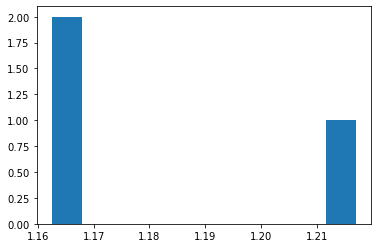

In [39]:
plt.hist(df["val_loss"])

## 3.3 Jednowymairowe zależności


### 3.3.1 Pierwsza warstwa neurony

Text(0.5, 1.0, 'Log-Loss  as function of first_neuron')

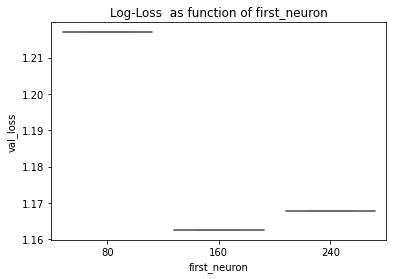

In [40]:
metric = 'first_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss  as function of {metric}')

Text(0.5, 1.0, 'CI Validation Loss as function of first neuron')

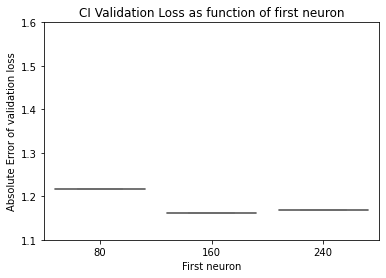

In [3]:
metric = 'first_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_ylim([1.1, 1.6]) 
ax.set_ylabel('Absolute Error of validation loss')
ax.set_xlabel('First neuron')
ax.set_title('CI Validation Loss as function of first neuron') #ta


### 3.3.2 Liczba ukrytych neuronów

Text(0.5, 1.0, 'Log-Loss as function of hidden_neuron')

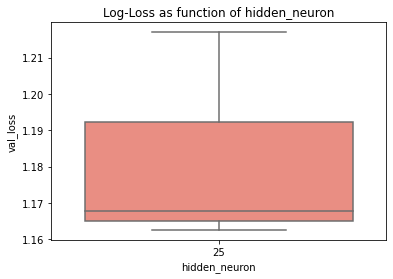

In [41]:
metric = 'hidden_neuron'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Log-Loss as function of {metric}')

### 3.3.3 Liczba ukrytych warstw

Text(0.5, 1.0, 'Validation Loss as function of hidden_layers')

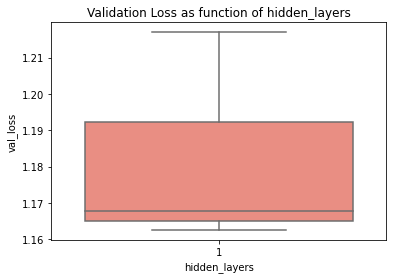

In [42]:
metric = 'hidden_layers'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


### 3.3.4 Batch Size

Text(0.5, 1.0, 'Validation Loss as function of batch_size')

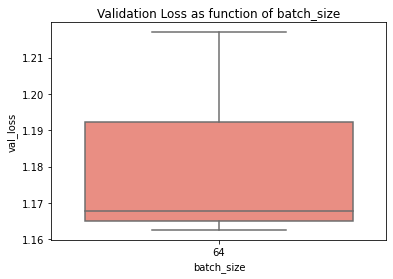

In [43]:
metric = 'batch_size'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


### 3.3.5 kernel_initializer

Text(0.5, 1.0, 'Validation Loss as function of kernel_initializer')

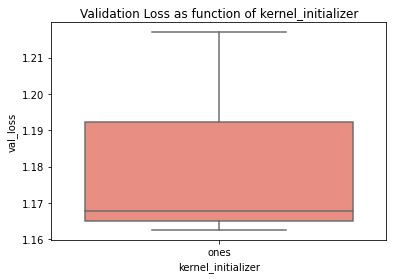

In [44]:
metric = 'kernel_initializer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')

### 3.3.6 activation_layer

Text(0.5, 1.0, 'Validation Loss as function of activation_layer')

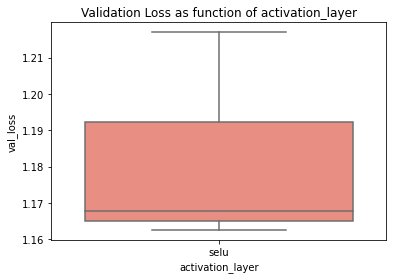

In [45]:
metric = 'activation_layer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')